## CliffWalking Environment


```


gym.make("CliffWalking-v0")
```



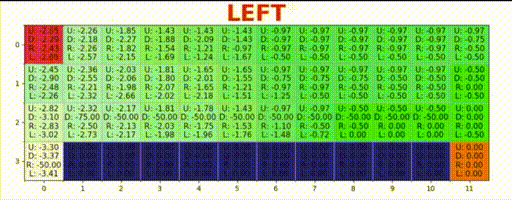

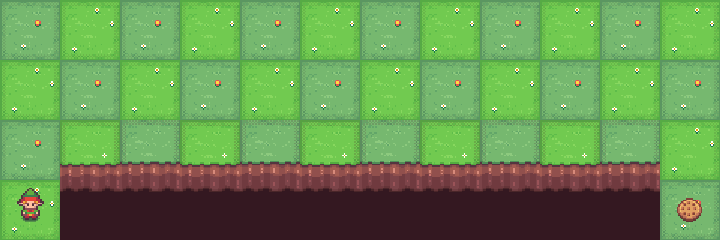

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

# Imports

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 13.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 65.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        cv2_imshow(img_bgr)
        time.sleep(0.5)
        output.clear()


# CliffWalking CODES

## 1.
Implementing a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1]. Studying the effect of $\alpha$ on Q-learning and demonstrate using plots. Plotting the learning curve of the policies learnt in each case using  episode vs. avg reward/episode.

In [ ]:
# Defining the beahavious policy
# beahavious policy = random behaviour
def behaviour_policy(state):
  action = np.random.randint(0,4)
  next_state, reward, terminated,truncated,info_= env.step(action)
  return action, next_state, reward, terminated,truncated

# Implementing Q-learning (off-policy TD Control) for estimating pi=pi*
def Q_learning(env,gamma, alpha, num_episodes, steps_per_episode):
  no_States = env.observation_space.n
  no_Actions = env.action_space.n
  # Initializing Q-table
  Q = np.zeros((no_States, no_Actions))
  reward_in_episode = []
  # reward_in_episode = []

  # Looping for each episode
  for episode in range(num_episodes):
    state,_ = env.reset()
    # state = env.reset()
    reward_in_ep = 0
    ep_length = 0
    #looping for each step of the episode
    while True:
    # for step in range(steps_per_episode):
      ep_length += 1
      action, next_state, reward, terminated,truncated = behaviour_policy(state)
      # action, next_state, reward, done = behaviour_policy(state)
      reward_in_ep += reward
      next_action = np.argmax(Q[next_state])
      Q[state, action] = Q[state,action] + alpha*(reward + (gamma)*Q[next_state,next_action] - Q[state, action])
      state = next_state
      if terminated: # episode is terminated when agent reaches goal
        reward_in_ep += reward
        break
      if truncated:
        reward_in_ep += reward
        break
    # avg_reward_in_episode.append((reward_in_ep/ep_length))
    reward_in_episode.append(reward_in_ep)

  avg_reward_per_episode = []
  for i in range(len(reward_in_episode)):
    y = 0
    for j in range(0,i+1):
      y += reward_in_episode[j]
    y = y/(i+1)
    avg_reward_per_episode.append(y)

  return Q,avg_reward_per_episode

In [ ]:
env = gym.make('CliffWalking-v0')

# setting alpha ((= learning rate)
alpha_vals =  [0.0005,0.005,0.01,0.07,0.1]

# setting discount factor gamma
gamma = 0.9

# setting number of episodes
num_episodes = 100

# Setting the number of steps per episode
steps_per_episode = 500
Q_tables = []
avg_r_per_ep_per_alpha = []
for alpha in alpha_vals:
  Q,avg_reward_per_episode = Q_learning(env,gamma, alpha, num_episodes, steps_per_episode)
  Q_tables.append(Q)
  avg_r_per_ep_per_alpha.append(avg_reward_per_episode)

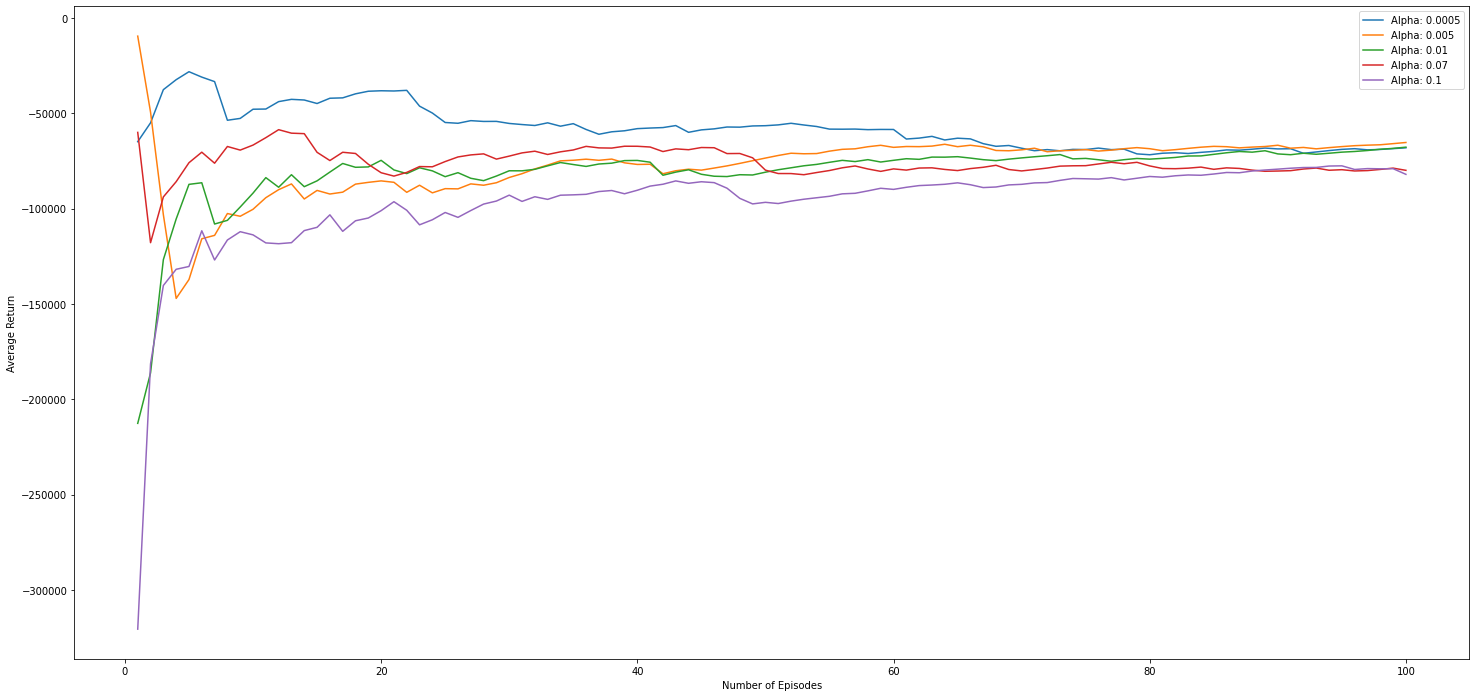

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
x = np.arange(1,num_episodes+1,1)
plt.plot(x,avg_r_per_ep_per_alpha[0], label='Alpha: 0.0005')
plt.plot(x,avg_r_per_ep_per_alpha[1], label='Alpha: 0.005')
plt.plot(x,avg_r_per_ep_per_alpha[2], label='Alpha: 0.01')
plt.plot(x,avg_r_per_ep_per_alpha[3], label='Alpha: 0.07')
plt.plot(x,avg_r_per_ep_per_alpha[4], label='Alpha: 0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Return')
plt.legend()
plt.show()

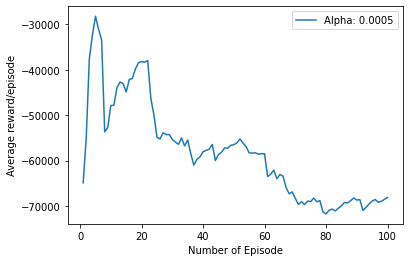

In [ ]:
plt.plot(x,avg_r_per_ep_per_alpha[0], label='Alpha: 0.0005')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

Observation: The learning is slow as shown by the high fluctuations in the graph. The agent does learn eventually since the graph shows convergence.

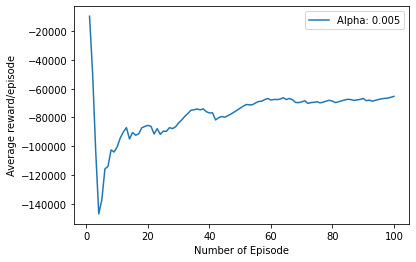

In [ ]:
plt.plot(x,avg_r_per_ep_per_alpha[1], label='Alpha: 0.005')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

Observation: Learning is fast since fluctuations in the graph are a fewer. The graph keeps on increasing and eventually converges which means that it has learnt. Also, on comparison with the other alpha values, the reward given by 0.005 his highest which implies it is the best choice of alpha.

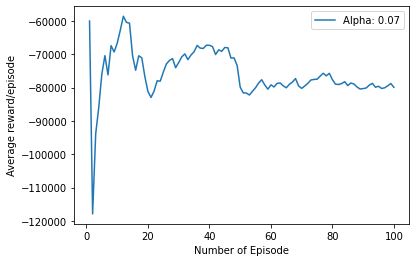

In [ ]:
plt.plot(x,avg_r_per_ep_per_alpha[3], label='Alpha: 0.07')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

Observation: high fluctuations in the start of the graph imply slow learning but after about 50 episodes the learning is fast as shown by the small oscillations. It converges to near optimal policy since the final erward obtained after 100 episodes is little less than that obtained by alpha=0.005

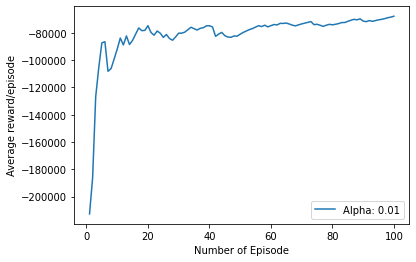

In [ ]:
plt.plot(x,avg_r_per_ep_per_alpha[2], label='Alpha: 0.01')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

Observation: Learning is really fast as can be seen by the smooth nature of the curve. Also, since the average rewards/episode is increasing it means that the agent is learning.

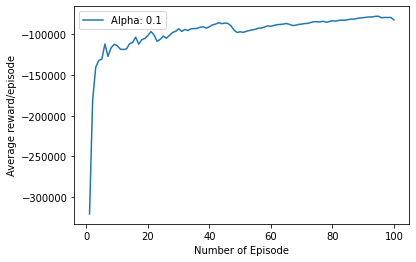

In [ ]:
plt.plot(x,avg_r_per_ep_per_alpha[4], label='Alpha: 0.1')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

Observation: The graph is smooth and keeps on increasing which implies it is learning. It hasn't given us the optimal policy in 100 episodes since the reward it gives is less than the reward given by other alpha values.

Effect of α on Q-learning:


1.   Alpha = 0.0005 gives the highest reward. Although the learning in the start is slow but it converges to optimal policy since it is giving the highest amount of reward compared to other alpha values.
2. As alpha is increased, leads to faster convergence which means it leads to faster learning. But it gives us a suboptimal policy because it gives lower reward as compared to lower alpha values.
3. Alpha = 0.005 seems like the best value to be chosen for Q-learning in given case because even though it has a few fluctuations in the beginning, but it conoverges to the highest reward vvalue in the same number of episodes as other alpha values. Alpha = 0.01 can be considered the next best choice for alpha because it learns the fastest(as shoen by the least number of fluctuations and convergence to nearly the same reward).

## 2.
Implementing Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. Studying the effect of $\epsilon$ on the performance of Q-Learning. Creating a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below.

In [ ]:
# Defining the beahavious policy
# beahavious policy = epsilon greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.random()
  if prob_dist < epsilon:
    action = np.random.randint(0,4)
  else:
    action = np.argmax(Q[state])
  next_state, reward, terminated,truncated,info_= env.step(action)
  return action, next_state, reward, terminated,truncated

# Implementing Q-learning (off-policy TD Control) for estimating pi=pi*
def Q_learning_q2(env,gamma, alpha,epsilon, num_episodes, steps_per_episode):
  no_States = env.observation_space.n
  no_Actions = env.action_space.n
  # Initializing Q-table
  Q = np.zeros((no_States, no_Actions))
  reward_per_episode = []

  # Looping for each episode
  for episode in range(num_episodes):
    state,_ = env.reset()
    reward_in_episode = 0
    ep_length = 0
    #looping for each step of the episode
    for step in range(steps_per_episode):
      ep_length += 1
      action, next_state, reward, terminated,truncated = behaviour_policy(Q,state,epsilon)
      reward_in_episode += reward
      next_action = np.argmax(Q[next_state])

      Q[state, action] = Q[state,action] + alpha*(reward + (gamma)*Q[next_state,next_action] - Q[state, action])
      state = next_state
      if terminated: # episode is terminated when agent reaches goal
        reward_in_episode += reward
        break
      if truncated:
        reward_in_episode += reward
        break
    reward_per_episode.append(reward_in_episode)

  return Q,reward_per_episode

In [ ]:
env = gym.make('CliffWalking-v0')

# Setting the number of steps per episode
steps_per_episode = 500

# setting alpha (= learning rate)
alpha = 0.0001

# setting discount factor gamma
gamma = 0.9

# setting number of episodes
num_episodes = 10000

epsilon_vals =  [0.95, 0.76, 0.55, 0.25, 0.1]

Q_3_0 = []
Q_0_4 = []
Q_1_7 = []
Q_2_9 = []
Q_tables = []
avg_r_per_ep_per_epsilon = []
specificState_q_val = []
for epsilon in epsilon_vals:
  Q,reward_per_episode = Q_learning_q2(env,gamma, alpha,epsilon, num_episodes, steps_per_episode)
  q_3_0 = []
  q_0_4 = []
  q_1_7 = []
  q_2_9 = []
  for a in [0,1,2,3]:
    q_val = Q[36,a]
    q_3_0.append(q_val)
  for a in [0,1,2,3]:
    q_val = Q[4,a]
    q_0_4.append(q_val)
  for a in [0,1,2,3]:
    q_val = Q[19,a]
    q_1_7.append(q_val)
  for a in [0,1,2,3]:
    q_val = Q[33,a]
    q_2_9.append(q_val)

  Q_3_0.append(q_3_0)
  Q_0_4.append(q_0_4)
  Q_1_7.append(q_1_7)
  Q_2_9.append(q_2_9)
  Q_tables.append(Q)

  # calculate running average of reward
  avg_reward_per_ep = [] # this is running avegrage
  for i in range(len(reward_per_episode)):
    y = 0
    for j in range(0,i+1):
      y += reward_per_episode[j]
    y = y/(i+1)
    avg_reward_per_ep.append(y)
  avg_r_per_ep_per_epsilon.append(avg_reward_per_ep)

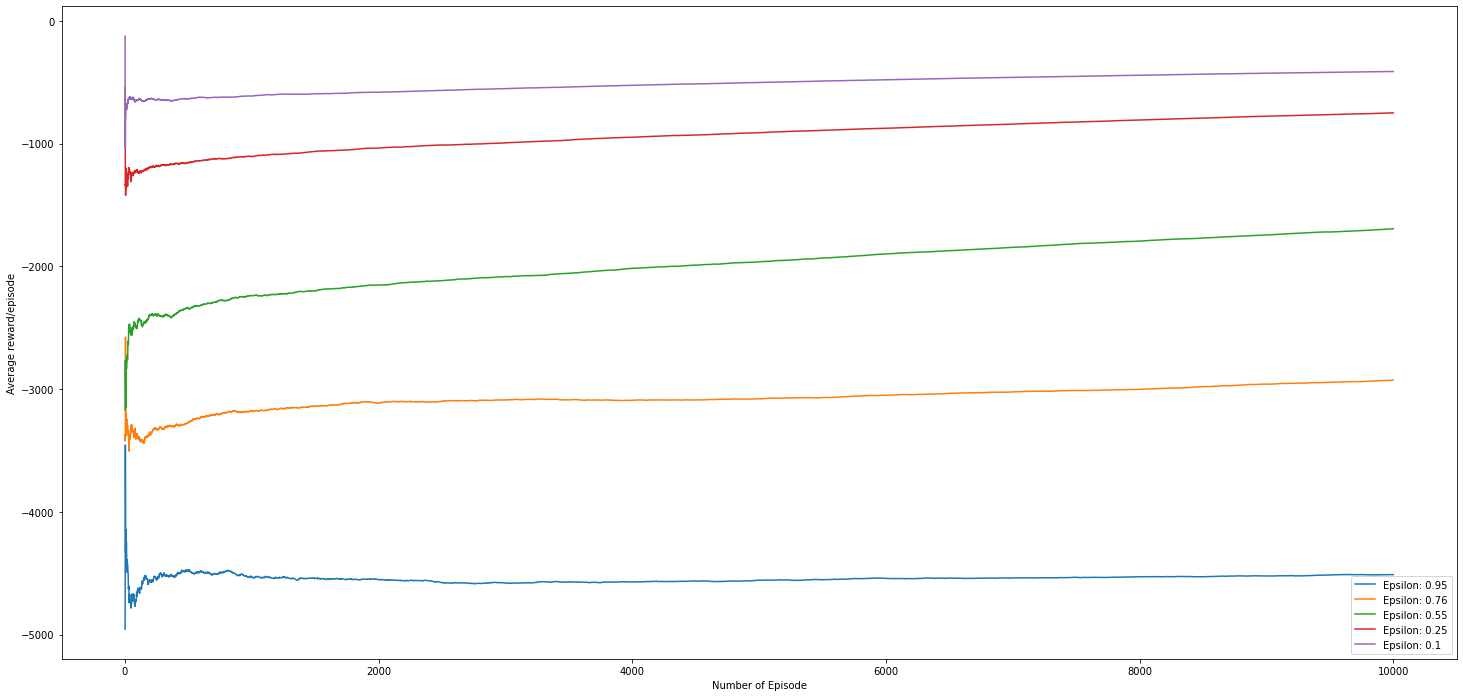

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
x = np.arange(1,10001,1)
plt.plot(x,avg_r_per_ep_per_epsilon[0], label='Epsilon: 0.95')
plt.plot(x,avg_r_per_ep_per_epsilon[1], label='Epsilon: 0.76')
plt.plot(x,avg_r_per_ep_per_epsilon[2], label='Epsilon: 0.55')
plt.plot(x,avg_r_per_ep_per_epsilon[3], label='Epsilon: 0.25')
plt.plot(x,avg_r_per_ep_per_epsilon[4], label='Epsilon: 0.1')
plt.xlabel('Number of Episode')
plt.ylabel('Average reward/episode')
plt.legend()
plt.show()

An epsilon-greedy policy means we are exploring (i.e, selecting random actions) with probablity epsilon and exploiting(i.e., choosing actions with maximum expected reward) with probablility (1-epsilon). A higher value of epsilon means we are exploring more and exploiting less. This leads to slower convergence to an optimal policy and lower overall performance.
> * As we can see in the above graph, a higher value of epsilon has a lower cumulative reward and high fluctuations. Higher amount of fluctuations indicate that the agent is not choosing the action which would maximimze the cumulative sum of rewards, instaed it is choosing actions randomly. These fluctuations are visible in the starting region of the graph(number of episode less than 1500).
> * After a lot of iterations, the policies converge. But a higher value of epsilon does not vonverge to optimal policy and this can be seen in the above graph by the fact that the graphs are converging at different values of rewards. As epsilon increases, the final cumulative reward becomes smaller indicating it is a suboptimal policy.  

In [ ]:
Q_avg_3_0 = []
Q_avg_0_4 = []
Q_avg_1_7 = []
Q_avg_2_9 = []

for i in range(len(epsilon_vals)):
  q = 0
  for j in range(len(Q_3_0[i])):
    q+=Q_3_0[i][j]
  q = q/(j+1)
  Q_avg_3_0.append(q)

  q = 0
  for j in range(len(Q_0_4[i])):
    q+=Q_0_4[i][j]
  q = q/(j+1)
  Q_avg_0_4.append(q)

  q = 0
  for j in range(len(Q_1_7[i])):
    q+=Q_1_7[i][j]
  q = q/(j+1)
  Q_avg_1_7.append(q)

  q = 0
  for j in range(len(Q_2_9[i])):
    q+=Q_2_9[i][j]
  q = q/(j+1)
  Q_avg_2_9.append(q)

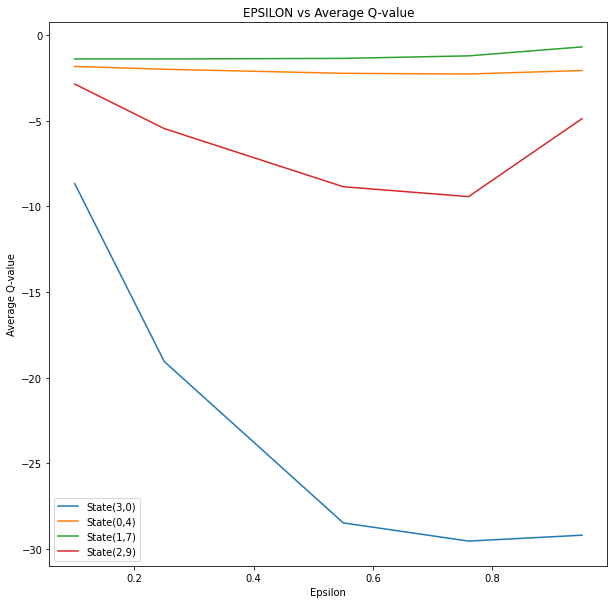

In [ ]:
# Graph of EPSILON vs Average Q-value
plt.figure(figsize=(10,10))
plt.plot(epsilon_vals,Q_avg_3_0, label='State(3,0)')
plt.plot(epsilon_vals,Q_avg_0_4, label='State(0,4)')
plt.plot(epsilon_vals,Q_avg_1_7, label='State(1,7)')
plt.plot(epsilon_vals,Q_avg_2_9, label='State(2,9)')
plt.xlabel('Epsilon')
plt.ylabel('Average Q-value')
plt.title('EPSILON vs Average Q-value')
plt.legend()
plt.show()

## 3.
Discussing the relationship/similarities between Purely Random policy and $ϵ$- greedy policy. Commenting on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?

Purely Random policy and epsilon-greedy policy are similar since they select actions randomly, but they differ in the way they balance exploration & exploitation.

A purely random policy is one where agent selects actions uniformly at random (no regard is given to current state or the expected returns). This is good for exploring(discovering new states and actions) the environment. But, it can lead to suboptimal behavior because the agent spends time randomly in any state and and these states might have low expected rewards.

Epsilon-greedy policy has a balance between exploration and exploitation. The agent takes actions randomly with probability epsilon, and selects the action with the highest expected reward with probability 1-epsilon. This allows the agent to balance exploration and exploitation, as it will sometimes take random actions to explore new states, but will also favor actions that have been found to have high expected rewards. A higher value of epsilon leads to more exploration and lower values leading to more exploitation.

**Performance difference between Purely Random policy & epsilon-greedy policy:**

>A purely random policy may have slower convergence to an optimal policy in general. In Q-learning the q-values are updated based on rewards obtained by taking action in the current state. A purely random policy may not always select actions that maximize the expected future reward. As a result, the Q-values may not converge to their optimal values, and the policy may not be able to achieve the maximum possible cumulative reward. On the other hand, an epsilon-greedy policy can balance exploration and exploitation. This can lead to better long-term performance, as the Q-values can converge more quickly to their optimal values, and the policy can achieve a higher cumulative reward.


Affect of epsilon in epsilon-greedy policy:
> A higher value of epsilon can be useful for exploring the environment and discovering new states and actions, but it can also lead to slower convergence to an optimal policy. A lower value of epsilon can be useful for exploiting the knowledge the agent has already acquired, but it may lead to the agent getting stuck in suboptimal policies.

Thus, epsilon-greedy policy can offer better long-term performance by balancing exploration and exploitation, and by allowing the Q-values to converge more quickly to their optimal values.

Yes, Random policy is a special case of epsilon-greedy policy. essentially, it is an epsilon-greedy policy with epsilon = 1.

## 4.
Implementing Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plotting the learning curve of the policy being learnt using episode vs. avg reward/episode.

In [ ]:
# Defining the beahavious policy
# beahavious policy = epsilon greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.random()
  if prob_dist < epsilon:
    action = np.random.randint(0,4)
  else:
    action = np.argmax(Q[state])
  next_state, reward, terminated,truncated,info_= env.step(action)
  return action, next_state, reward, terminated,truncated

# Implementing Q-learning (off-policy TD Control) for estimating pi=pi*
def Q_learning_q4(env,gamma, alpha,epsilon, num_episodes):
  no_States = env.observation_space.n
  no_Actions = env.action_space.n
  # Initializing Q-table
  Q = np.zeros((no_States, no_Actions))
  reward_per_episode = []

  initial_epsilon = epsilon
  final_epsilon = 0.01
  decay_rate = 0.01

  # Looping for each episode
  for episode in range(num_episodes):
    state,_ = env.reset()
    reward_in_episode = 0
    ep_length = 0
    terminated = False
    truncated = False
    #looping for each step of the episode
    while (not terminated) and (not truncated):
      ep_length += 1
      action, next_state, reward, terminated,truncated = behaviour_policy(Q,state,epsilon)
      reward_in_episode += reward
      next_action = np.argmax(Q[next_state])

      Q[state, action] = Q[state,action] + alpha*(reward + (gamma)*Q[next_state,next_action] - Q[state, action])
      state = next_state
      if terminated: # episode is terminated when agent reaches goal
        reward_in_episode += reward
        break
      if truncated:
        reward_in_episode += reward
        break
    epsilon = final_epsilon + (initial_epsilon - final_epsilon)*np.exp(-decay_rate * episode)
    reward_per_episode.append(reward_in_episode)

  avg_reward_per_episode = []
  for i in range(len(reward_per_episode)):
    y = 0
    for j in range(0,i+1):
      y += reward_per_episode[j]
    y = y/(i+1)
    avg_reward_per_episode.append(y)

  return Q,avg_reward_per_episode

In [ ]:
env = gym.make('CliffWalking-v0')
gamma = 0.9
alpha = 0.005
epsilon = 1
num_episodes = 1000
Q,avg_reward_per_episode = Q_learning_q4(env,gamma, alpha,epsilon, num_episodes)

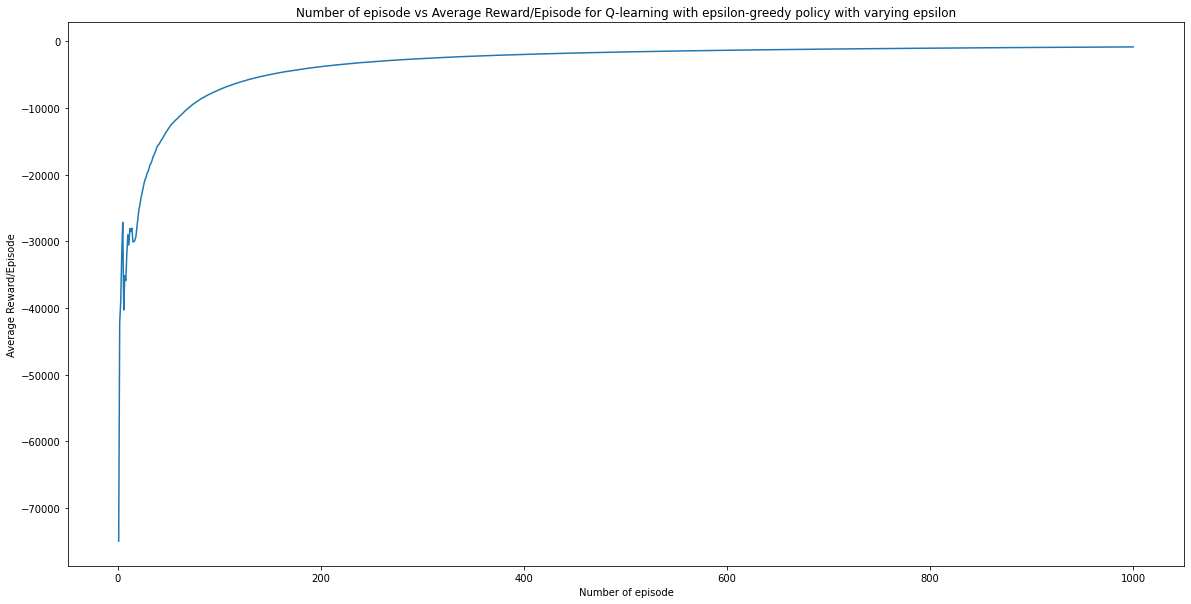

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
plt.plot(x,avg_reward_per_episode)
plt.xlabel('Number of episode')
plt.ylabel('Average Reward/Episode')
plt.title('Number of episode vs Average Reward/Episode for Q-learning with epsilon-greedy policy with varying epsilon')
plt.show()

#  Lunar Lander environment from OpenAI Gym.
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


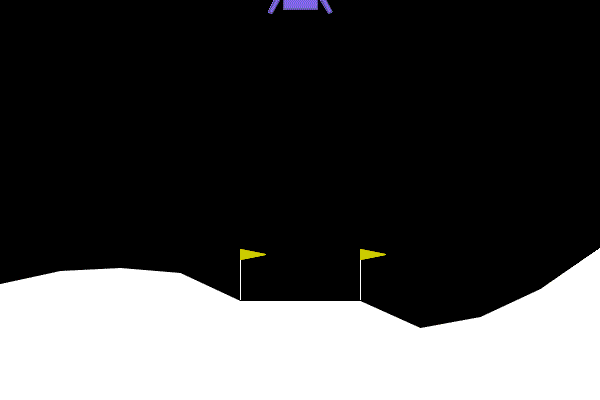

## Imports

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 15.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 21.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
def render():
  color = (255, 100, 0)
  pygame.display.flip()
  view = pygame.surfarray.array3d(screen)
  view = view.transpose([1, 0, 2])
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  cv2_imshow(img_bgr)
  time.sleep(0.5)
  output.clear()

## 1. SARSA and Expected SARSA

Considering $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implementing SARSA and Expected SARSA. Plotting the graphs for:  episode vs. max-time step and episode vs. average-reward in each case.

In [ ]:
# Implementing SARSA

# function to discretize observations into bins
def discretize(bins_size, observation):
  obs = []
  for i in range(len(observation)):
    obs.append(np.digitize(observation[i], obs_bins[i]) - 1)
  return tuple(obs)


# Defining the beahaviour policy
# beahavious policy = epsilon greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.uniform(0,1)
  if prob_dist < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state])
  return action

# Implementing SARSA (on-policy TD Control) for estimating Q = q*
def SARSA(env,Q,gamma,bins_size, alpha,epsilon, num_episodes):
  episode_length = []
  reward_in_episode = []
  # looping for each episode
  for i in range(num_episodes):
    reward_of_ep = 0
    ep_len = 0
    obs = env.reset()
    state = discretize(bins_size, obs[0])
    action = behaviour_policy(Q,state,epsilon)
    done = False
    while (not done):
      next_state, reward, done,truncated, _ = env.step(action)
      next_state_disc = discretize(bins_size, next_state)
      next_state_action = behaviour_policy(Q,next_state_disc,epsilon)
      Q[state, action] = Q[state, action] + alpha*(reward + gamma*(Q[next_state_disc]) - Q[state, action])
      state = next_state_disc
      action = next_state_action
      ep_len += 1
      reward_of_ep += reward
      if i == 0:
        print('Initial stage:')
        render()
      if i == num_episodes//2:
        print('Middle stage:')
        render()
      if i == int(num_episodes-1):
        print('Final stage:')
        render()
      if done:
        episode_length.append(ep_len)
        reward_in_episode.append(reward_of_ep)

        # print('ep no.:',i)
        # print('ep len:', ep_len)
        # print('reward:',reward_of_ep )
        break
  return Q, episode_length, reward_in_episode

In [ ]:
env = gym.make("LunarLander-v2", render_mode='human')

# Creating bins
bins_size = [10,10,10,10,10,10,2,2]
obs_bins = [np.linspace(env.observation_space.low[0], env.observation_space.high[0], bins_size[0]),
            np.linspace(env.observation_space.low[1], env.observation_space.high[1], bins_size[1]),
            np.linspace(env.observation_space.low[2], env.observation_space.high[2], bins_size[2]),
            np.linspace(env.observation_space.low[3], env.observation_space.high[3], bins_size[3]),
            np.linspace(env.observation_space.low[4], env.observation_space.high[4], bins_size[4]),
            np.linspace(env.observation_space.low[5], env.observation_space.high[5], bins_size[5]),
            np.linspace(env.observation_space.low[6], env.observation_space.high[6], bins_size[6]),
            np.linspace(env.observation_space.low[7], env.observation_space.high[7], bins_size[7])]

gamma = 0.9
epsilon = 0.1
alpha = 0.01
num_episodes = 200
no_Actions = env.action_space.n

# Initializing Q-table
Q = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
# Training the agent
Q, episode_length, reward_in_episode = SARSA(env,Q,gamma,bins_size, alpha,epsilon, num_episodes)

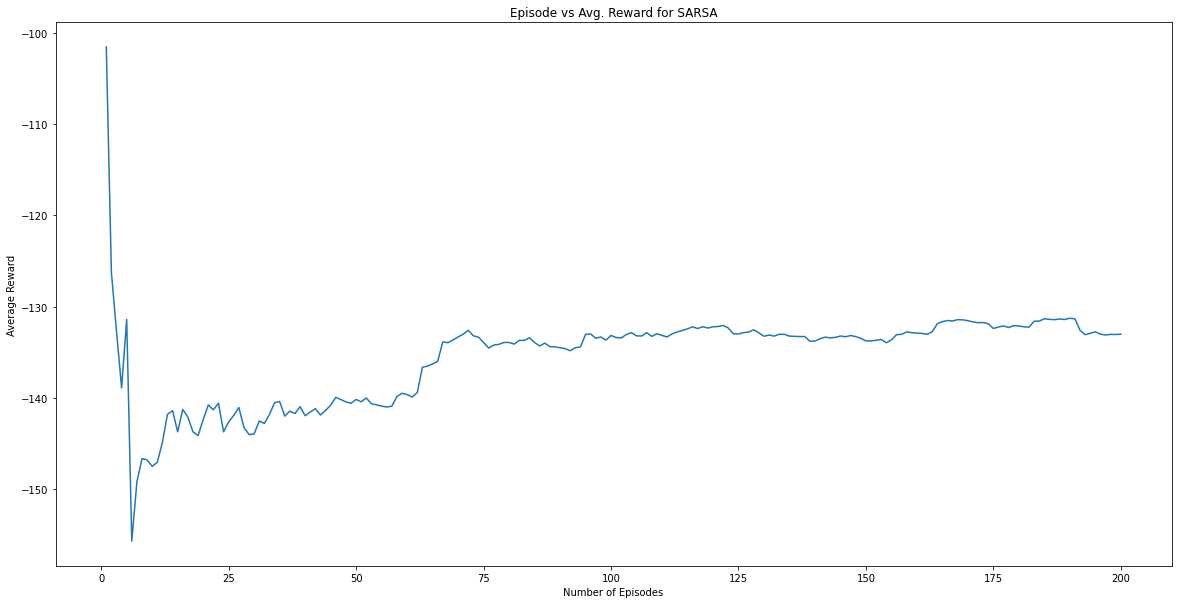

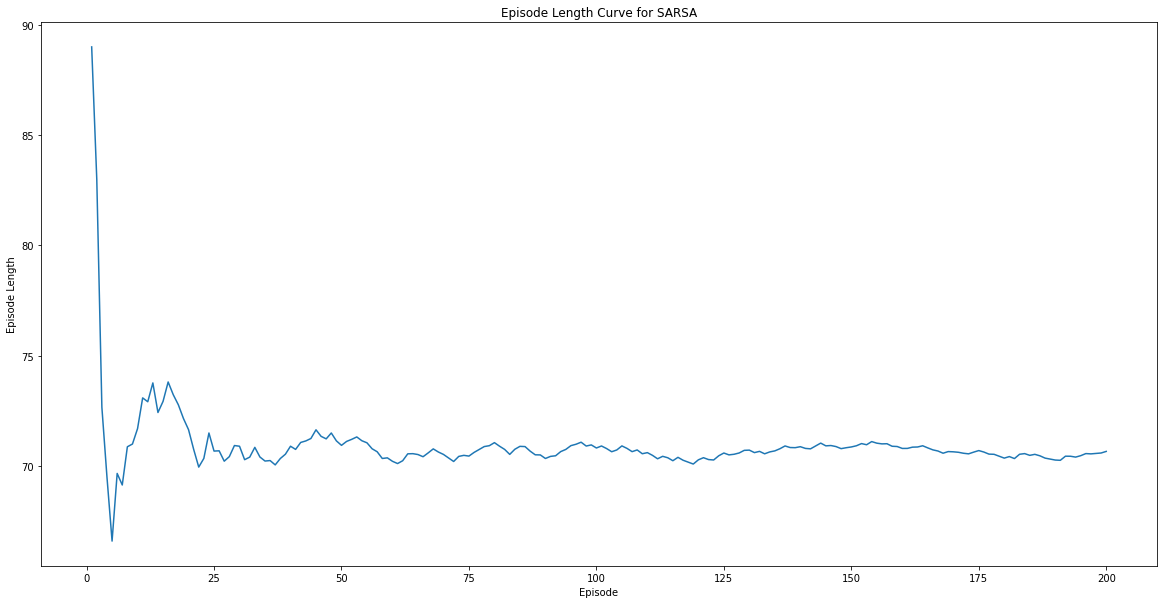

In [ ]:
# calculate running average of reward
avg_reward_per_ep = [] # this is running avegrage
for i in range(len(reward_in_episode)):
  y = 0
  for j in range(0,i+1):
    y += reward_in_episode[j]
  y = y/(i+1)
  avg_reward_per_ep.append(y)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
plt.plot(x,avg_reward_per_ep)
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA')

# calculate running average of episode lengths
running_avg_eplen = [sum(episode_length[:i])/i for i in range(1, len(episode_length)+1)]

# plot the learning curve
plt.figure(figsize=(20,10))
plt.plot(range(1, num_episodes+1), running_avg_eplen)
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for SARSA')
plt.show()

# plt.figure(figsize=(20,10))
# x = np.arange(1,num_episodes+1,1)
# plt.plot(x,episode_length)
# plt.xlabel('Episode Number')
# plt.ylabel('Time step')
# plt.title('Episode Number vs Time-step for SARSA')

In [ ]:
# Implementing EXPECTED SARSA

# function to discretize observations into bins
def discretize(bins_size, observation):
  obs = []
  for i in range(len(observation)):
    obs.append(np.digitize(observation[i], obs_bins[i]) - 1)
  return tuple(obs)


# Defining the beahaviour policy
# beahavious policy = epsilon-greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.uniform(0,1)
  if prob_dist < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state])
  return action

# Implementing Expected SARSA (on-policy TD Control) for estimating Q = q*
def Expected_SARSA(env,Q,gamma,bins_size, alpha,epsilon, num_episodes):
  episode_length = []
  reward_in_episode = []
  # looping for each episode
  for i in range(num_episodes):
    reward_of_ep = 0
    ep_len = 0
    obs = env.reset()
    state = discretize(bins_size, obs[0])
    done = False
    while (not done):
      action = behaviour_policy(Q,state,epsilon)
      next_state, reward, done,truncated, _ = env.step(action)
      next_state_disc = discretize(bins_size, next_state)

      # calculatinf expected value
      expected_val = 0
      for a in range(env.action_space.n):
        expected_val += (Q[next_state_disc,a]) * behaviour_policy(Q,next_state_disc,epsilon)

      Q[state, action] = Q[state, action] + alpha*(reward + gamma*(expected_val) - Q[state, action])

      state = next_state_disc

      ep_len += 1
      reward_of_ep += reward
      if i == 0:
        print('Initial stage:')
        render()
      if i == num_episodes//2:
        print('Middle stage:')
        render()
      if i == int(num_episodes-1):
        print('Final stage:')
        render()

      if done:
        episode_length.append(ep_len)
        reward_in_episode.append(reward_of_ep)
        # print('ep no.:',i)
        # print('ep len:', ep_len)
        # print('reward:',reward_of_ep )
        break


  return Q, episode_length, reward_in_episode

In [ ]:
env = gym.make("LunarLander-v2", render_mode='human')

# # Creating bins
# # bins_size = [15,15,50,50,30,50,2,2]
# bins_size = [10,10,10,10,10,10,2,2]
# obs_bins = [np.linspace(env.observation_space.low[0], env.observation_space.high[0], bins_size[0]),
#             np.linspace(env.observation_space.low[1], env.observation_space.high[1], bins_size[1]),
#             np.linspace(env.observation_space.low[2], env.observation_space.high[2], bins_size[2]),
#             np.linspace(env.observation_space.low[3], env.observation_space.high[3], bins_size[3]),
#             np.linspace(env.observation_space.low[4], env.observation_space.high[4], bins_size[4]),
#             np.linspace(env.observation_space.low[5], env.observation_space.high[5], bins_size[5]),
#             np.linspace(env.observation_space.low[6], env.observation_space.high[6], bins_size[6]),
#             np.linspace(env.observation_space.low[7], env.observation_space.high[7], bins_size[7])]

gamma = 0.9
epsilon = 0.1
alpha = 0.01
num_episodes = 200
no_Actions = env.action_space.n

# Initializing Q-table
Q_expectedSARSA = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
# Training the agent
Q_expectedSARSA, episode_length_expectedSARSA, reward_in_episode_expectedSARSA = Expected_SARSA(env,Q_expectedSARSA,gamma,bins_size, alpha,epsilon, num_episodes)

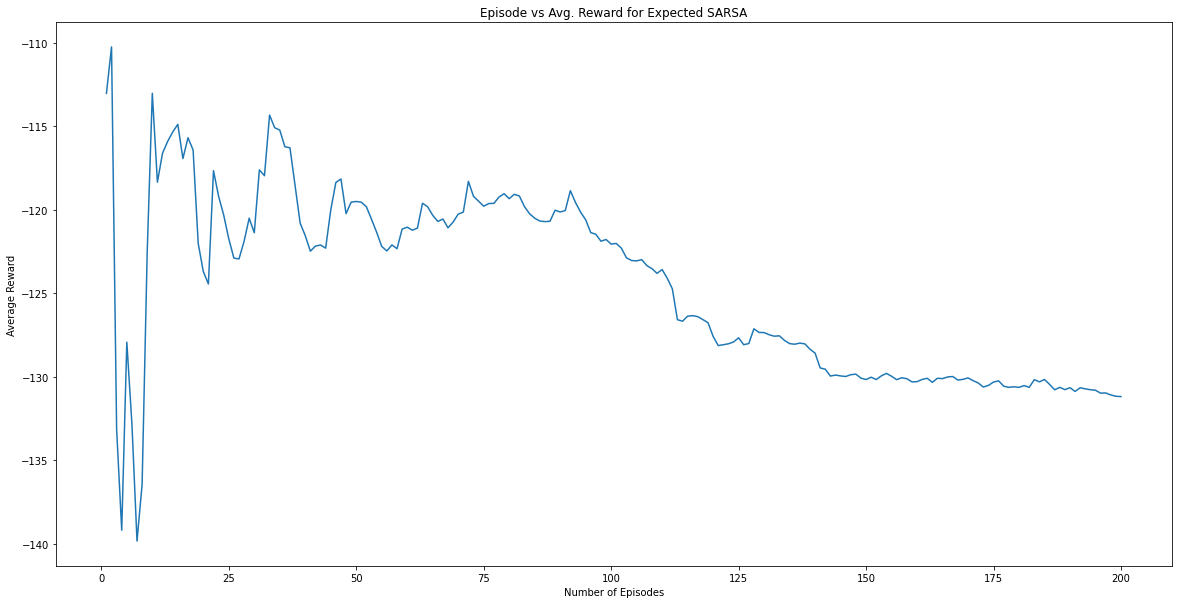

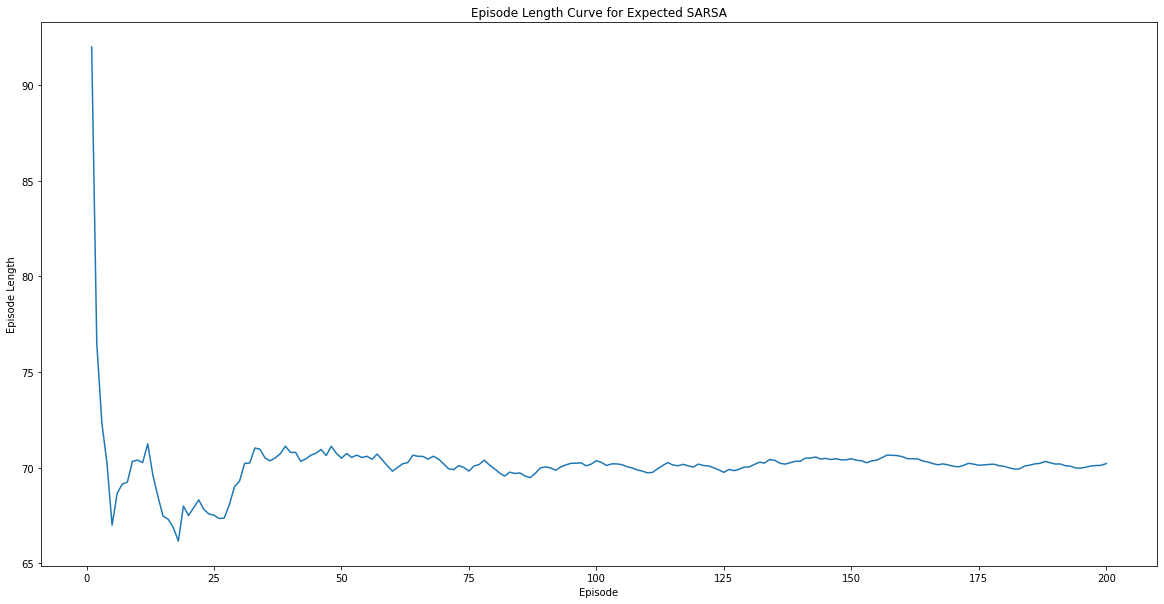

In [ ]:
avg_reward_per_ep_expSARSA = []
for i in range(len(reward_in_episode_expectedSARSA)):
  y = 0
  for j in range(0,i+1):
    y += reward_in_episode_expectedSARSA[j]
  y = y/(i+1)
  avg_reward_per_ep_expSARSA.append(y)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
plt.plot(x,avg_reward_per_ep_expSARSA)
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for Expected SARSA')

# plt.figure(figsize=(20,10))
# x = np.arange(1,num_episodes+1,1)
# plt.plot(x,episode_length_expectedSARSA)
# plt.xlabel('Episode Number')
# plt.ylabel('Time step')
# plt.title('Episode Number vs Time-step for Expected SARSA')

# calculate running average of episode lengths
running_avg_eplen_expSarsa = [sum(episode_length_expectedSARSA[:i])/i for i in range(1, len(episode_length_expectedSARSA)+1)]

# plot the learning curve
plt.figure(figsize=(20,10))
plt.plot(range(1, num_episodes+1), running_avg_eplen_expSarsa)
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for Expected SARSA')
plt.show()

**OBSERVATIONS**

Average reward for SARSA is around -145 while that of Expected SARSA is -130. Furthermore, episode length convergest to around 72 steps per episode in SARSA while it is arounf 70 steps in Expected SARSA.

Thus, we can say Expected SARSA gives better performance than SARSA.

## 2. SARSA and Expected SARSA

Experimenting with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discussing how changing $\alpha$ and $\epsilon$ affects the agent’s learning performance.

In [ ]:
# function to discretize observations into bins
def discretize(bins_size, observation):
  obs = []
  for i in range(len(observation)):
    obs.append(np.digitize(observation[i], obs_bins[i]) - 1)
  return tuple(obs)


# Defining the beahaviour policy
# beahavious policy = epsilon greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.uniform(0,1)
  if prob_dist < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state])
  return action

# Implementing SARSA (on-policy TD Control) for estimating Q = q*
def SARSA_non_render(env,Q,gamma,bins_size, alpha,epsilon, num_episodes):
  episode_length = []
  reward_in_episode = []
  # looping for each episode
  for i in range(num_episodes):
    reward_of_ep = 0
    ep_len = 0
    obs = env.reset()
    state = discretize(bins_size, obs[0])
    action = behaviour_policy(Q,state,epsilon)
    done = False
    while (not done):
      next_state, reward, done,truncated, _ = env.step(action)
      next_state_disc = discretize(bins_size, next_state)
      next_state_action = behaviour_policy(Q,next_state_disc,epsilon)
      Q[state, action] = Q[state, action] + alpha*(reward + gamma*(Q[next_state_disc]) - Q[state, action])
      state = next_state_disc
      action = next_state_action
      ep_len += 1
      reward_of_ep += reward
      if done:
        episode_length.append(ep_len)
        reward_in_episode.append(reward_of_ep)
        break
  return Q, episode_length, reward_in_episode


# Implementing Expected SARSA (on-policy TD Control) for estimating Q = q*
def Expected_SARSA_non_render(env,Q,gamma,bins_size, alpha,epsilon, num_episodes):
  episode_length = []
  reward_in_episode = []
  # looping for each episode
  for i in range(num_episodes):
    reward_of_ep = 0
    ep_len = 0
    obs = env.reset()
    state = discretize(bins_size, obs[0])
    done = False
    while (not done):
      action = behaviour_policy(Q,state,epsilon)
      next_state, reward, done,truncated, _ = env.step(action)
      next_state_disc = discretize(bins_size, next_state)

      # calculatinf expected value
      expected_val = 0
      for a in range(env.action_space.n):
        expected_val += (Q[next_state_disc,a]) * behaviour_policy(Q,next_state_disc,epsilon)

      Q[state, action] = Q[state, action] + alpha*(reward + gamma*(expected_val) - Q[state, action])

      state = next_state_disc

      ep_len += 1
      reward_of_ep += reward
      if done:
        episode_length.append(ep_len)
        reward_in_episode.append(reward_of_ep)
        break
  return Q, episode_length, reward_in_episode

In [ ]:
# Creating bins
# bins_size = [10,10,50,50,30,50,2,2]
bins_size = [10,10,10,10,10,10,2,2]
obs_bins = [np.linspace(env.observation_space.low[0], env.observation_space.high[0], bins_size[0]),
            np.linspace(env.observation_space.low[1], env.observation_space.high[1], bins_size[1]),
            np.linspace(env.observation_space.low[2], env.observation_space.high[2], bins_size[2]),
            np.linspace(env.observation_space.low[3], env.observation_space.high[3], bins_size[3]),
            np.linspace(env.observation_space.low[4], env.observation_space.high[4], bins_size[4]),
            np.linspace(env.observation_space.low[5], env.observation_space.high[5], bins_size[5]),
            np.linspace(env.observation_space.low[6], env.observation_space.high[6], bins_size[6]),
            np.linspace(env.observation_space.low[7], env.observation_space.high[7], bins_size[7])]

#Episode lenghts for multiple ALPHA with SARSA
eplen_SARSA_a1_e1 = []
eplen_SARSA_a1_e2 = []
eplen_SARSA_a1_e3 = []
eplen_SARSA_a1_e4 = []
eplen_SARSA_a2_e1 = []
eplen_SARSA_a2_e2 = []
eplen_SARSA_a2_e3 = []
eplen_SARSA_a2_e4 = []
eplen_SARSA_a3_e1 = []
eplen_SARSA_a3_e2 = []
eplen_SARSA_a3_e3 = []
eplen_SARSA_a3_e4 = []
eplen_SARSA_a4_e1 = []
eplen_SARSA_a4_e2 = []
eplen_SARSA_a4_e3 = []
eplen_SARSA_a4_e4 = []
#for alpha = 0.0005
eplen_SARSA_alpha1 = [eplen_SARSA_a1_e1, eplen_SARSA_a1_e2, eplen_SARSA_a1_e3, eplen_SARSA_a1_e4]
#for alpha = 0.005
eplen_SARSA_alpha2 = [eplen_SARSA_a2_e1, eplen_SARSA_a2_e2, eplen_SARSA_a2_e3, eplen_SARSA_a2_e4]
#for alpha = 0.01
eplen_SARSA_alpha3 = [eplen_SARSA_a3_e1, eplen_SARSA_a3_e2, eplen_SARSA_a3_e3, eplen_SARSA_a3_e4]
#for alpha = 0.1
eplen_SARSA_alpha4 = [eplen_SARSA_a4_e1, eplen_SARSA_a4_e2, eplen_SARSA_a4_e3, eplen_SARSA_a4_e4]

# Absolute reward in episode for multiple ALPHA with SARSA
rew_SARSA_a1_e1 = []
rew_SARSA_a1_e2 = []
rew_SARSA_a1_e3 = []
rew_SARSA_a1_e4 = []
rew_SARSA_a2_e1 = []
rew_SARSA_a2_e2 = []
rew_SARSA_a2_e3 = []
rew_SARSA_a2_e4 = []
rew_SARSA_a3_e1 = []
rew_SARSA_a3_e2 = []
rew_SARSA_a3_e3 = []
rew_SARSA_a3_e4 = []
rew_SARSA_a4_e1 = []
rew_SARSA_a4_e2 = []
rew_SARSA_a4_e3 = []
rew_SARSA_a4_e4 = []
#for alpha = 0.0005
rew_SARSA_alpha1 = [rew_SARSA_a1_e1, rew_SARSA_a1_e2, rew_SARSA_a1_e3, rew_SARSA_a1_e4]
#for alpha = 0.005
rew_SARSA_alpha2 = [rew_SARSA_a2_e1, rew_SARSA_a2_e2, rew_SARSA_a2_e3, rew_SARSA_a2_e4]
#for alpha = 0.01
rew_SARSA_alpha3 = [rew_SARSA_a3_e1, rew_SARSA_a3_e2, rew_SARSA_a3_e3, rew_SARSA_a3_e4]
#for alpha = 0.1
rew_SARSA_alpha4 = [rew_SARSA_a4_e1, rew_SARSA_a4_e2, rew_SARSA_a4_e3, rew_SARSA_a4_e4]

In [ ]:
env = gym.make("LunarLander-v2")
gamma = 0.9
ALPHA = [0.0005, 0.005, 0.01, 0.1]
EPSILON = [0.9,0.5,0.3,0.1]
num_episodes = 100
no_Actions = env.action_space.n

# running SARSA
for i in range(len(ALPHA)):
  for j in range(len(EPSILON)):
    # Initializing Q-table
    Q = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
    # Training the agent
    if ALPHA[i]==0.0005:
      Q, eplen_SARSA_alpha1[j], rew_SARSA_alpha1[j] = SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.005:
      Q, eplen_SARSA_alpha2[j], rew_SARSA_alpha2[j] = SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.01:
      Q, eplen_SARSA_alpha3[j], rew_SARSA_alpha3[j] = SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.1:
      Q, eplen_SARSA_alpha4[j], rew_SARSA_alpha4[j] = SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)

In [ ]:
#function to calculate average running reward
def avg_running_reward_calculator(reward_in_episode):
  avg_reward_per_ep = [] # this is running avegrage
  for i in range(len(reward_in_episode)):
    y = 0
    for j in range(0,i+1):
      y += reward_in_episode[j]
    y = y/(i+1)
    avg_reward_per_ep.append(y)
  return avg_reward_per_ep

# function to calculate running average of episode lengths
def running_avg_eplen_calculator(episode_length):
  running_avg_eplen = [sum(episode_length[:i])/i for i in range(1, len(episode_length)+1)]
  return running_avg_eplen

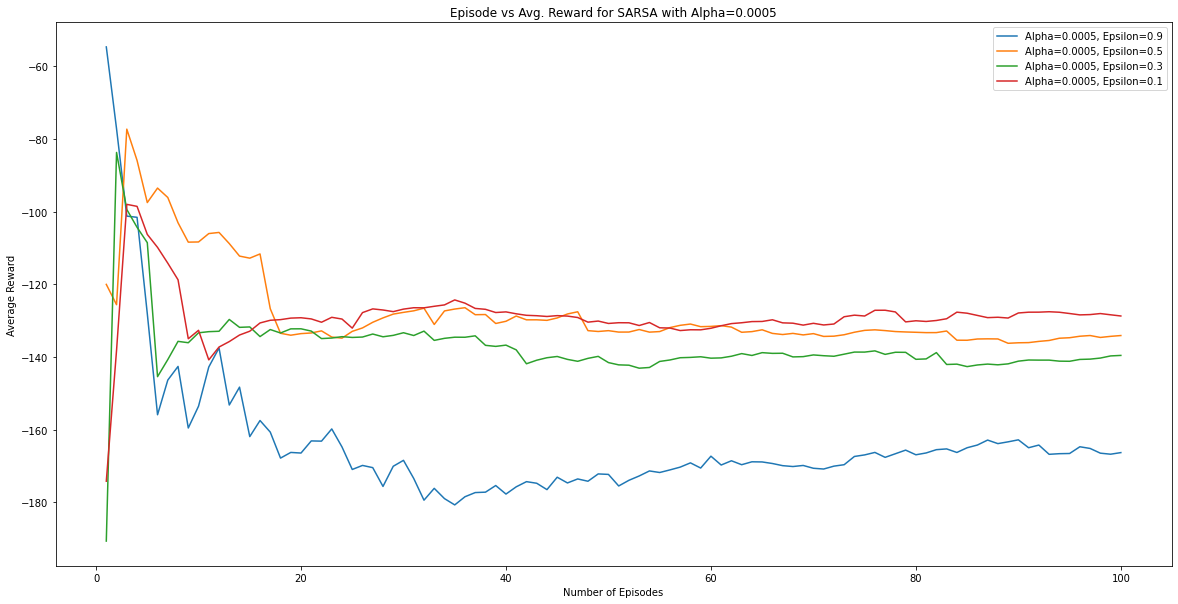

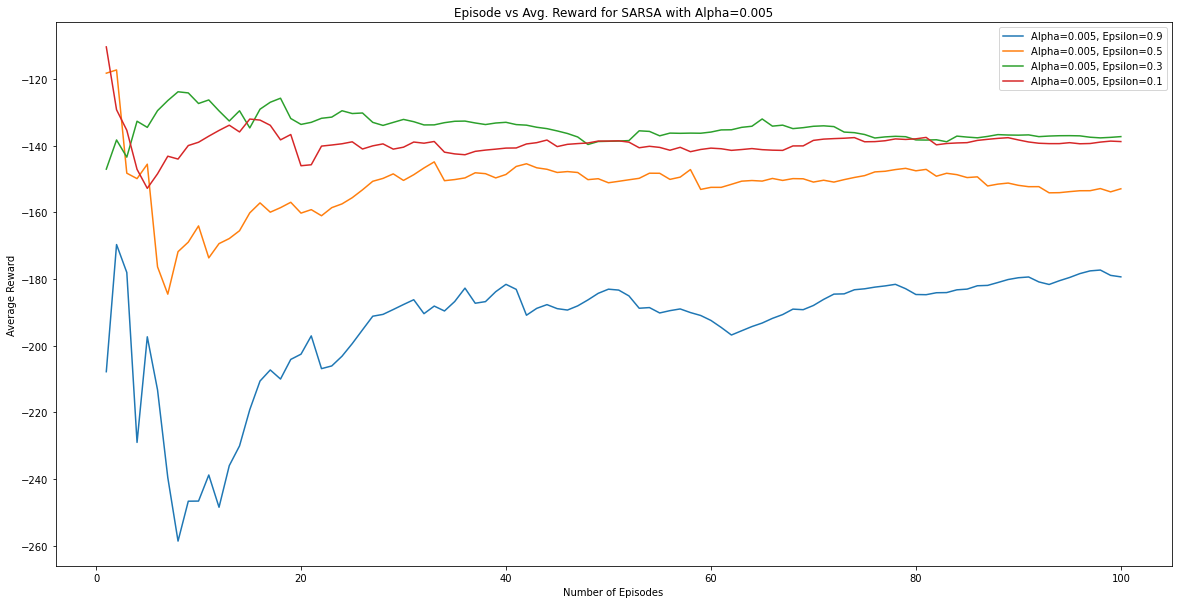

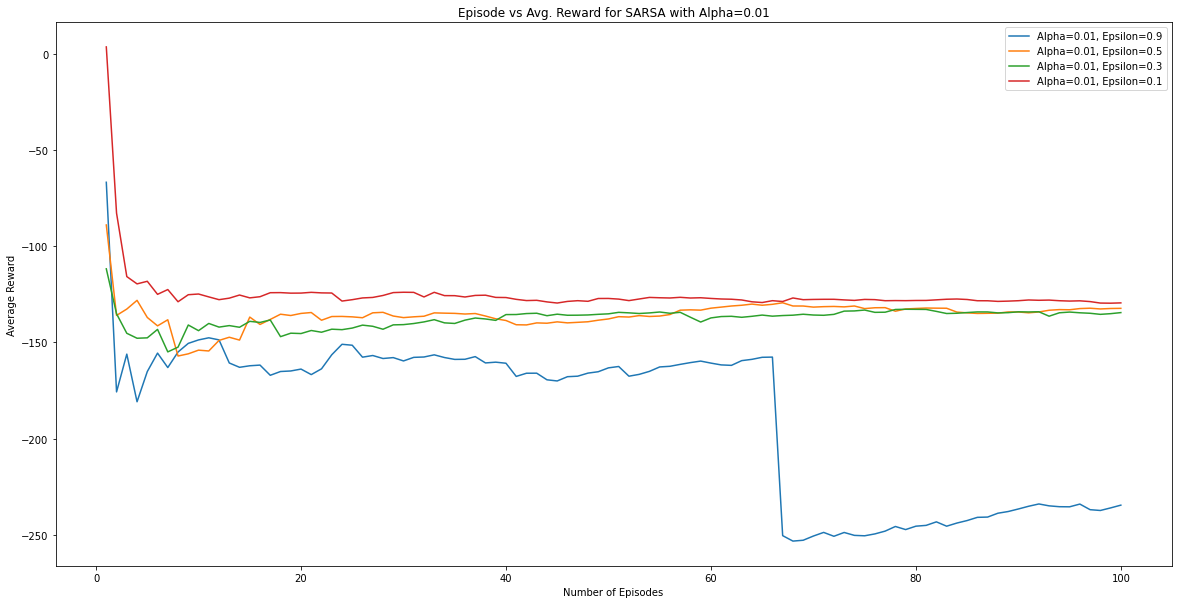

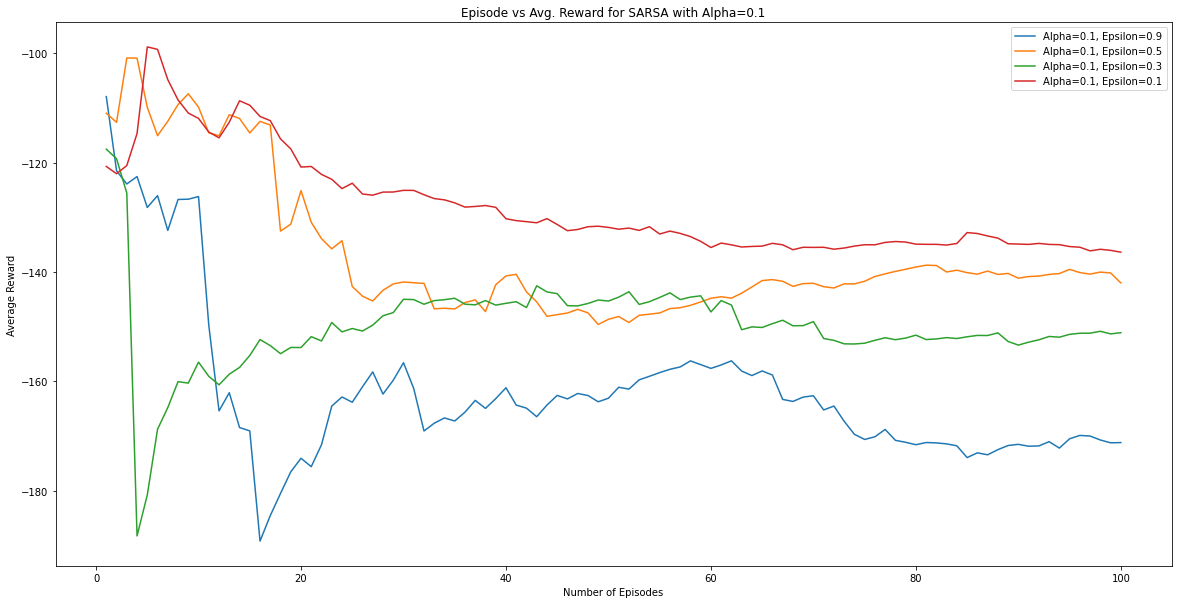

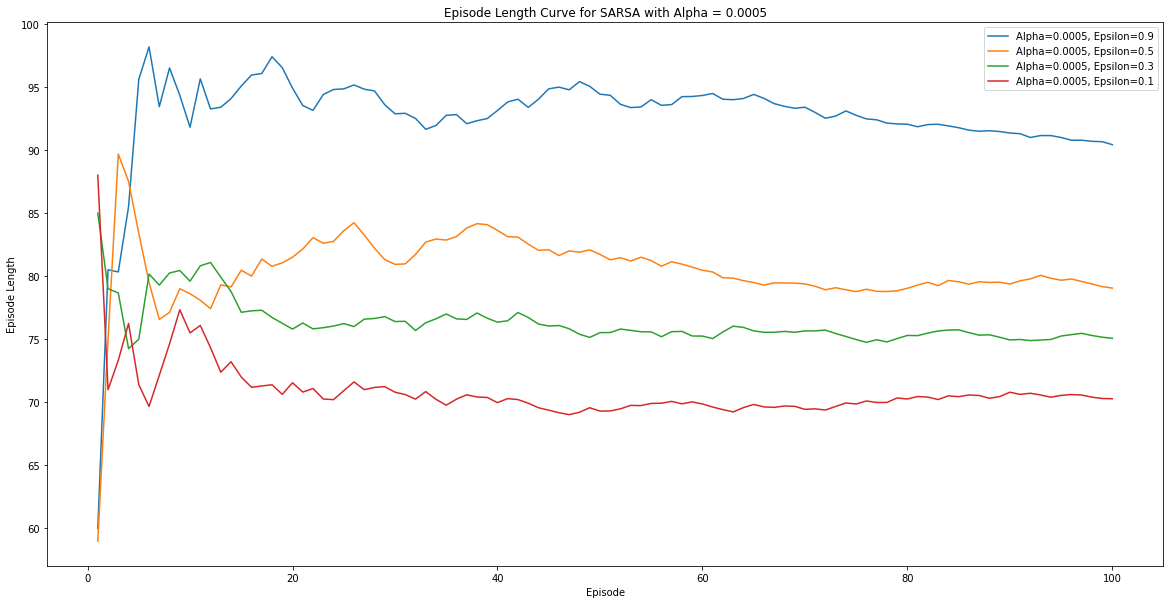

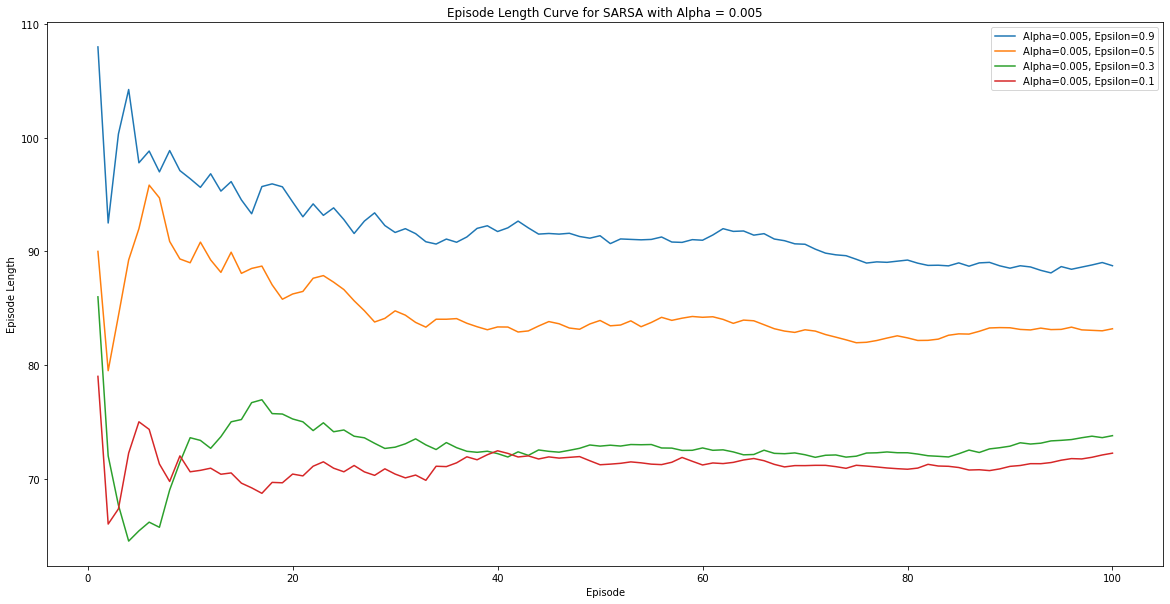

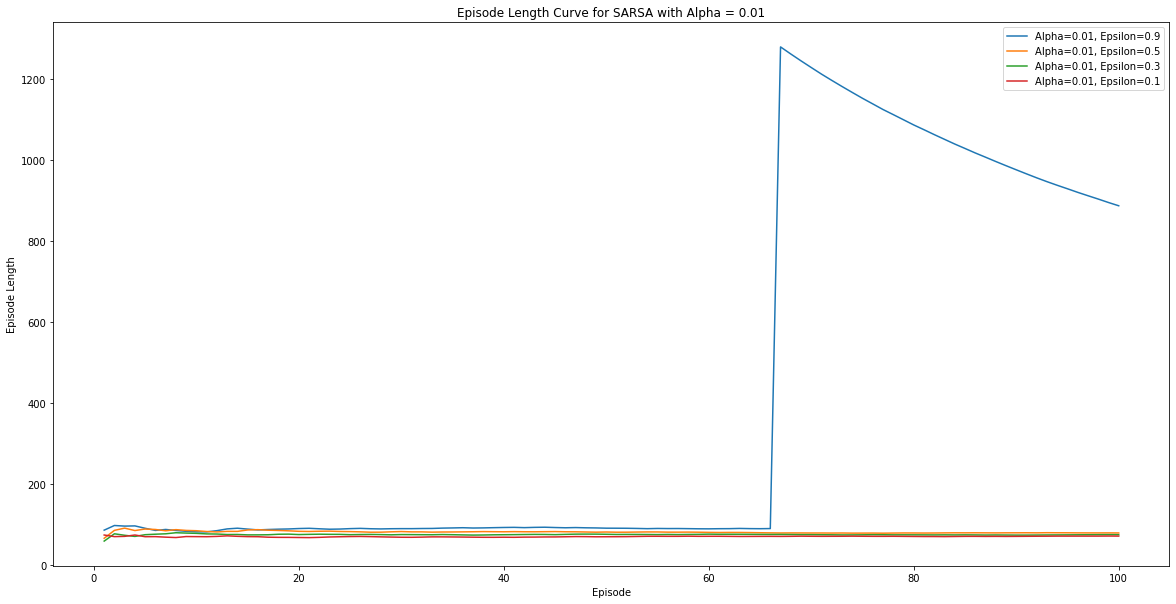

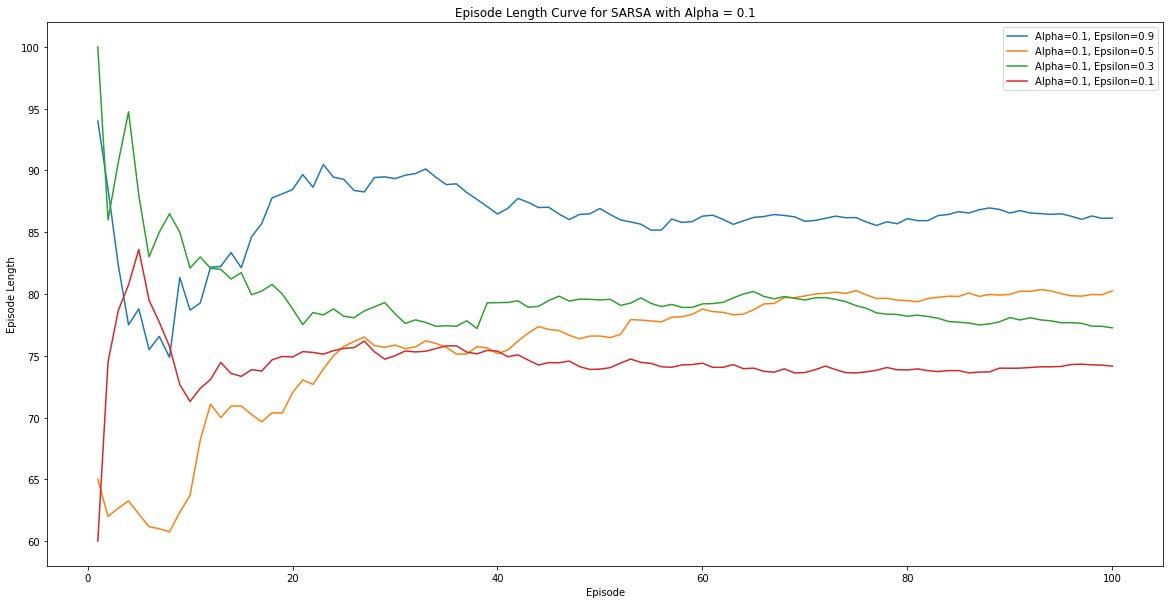

In [ ]:
import matplotlib.pyplot as plt

# MAKING GRAPHS
# Graphs for SARSA
# Graphs for Episode vs Avg. Reward for SARSA for Alpha=0.0005
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_SARSA_alpha1[0])
plt.plot(x,y1, label='Alpha=0.0005, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_SARSA_alpha1[1])
plt.plot(x,y2, label='Alpha=0.0005, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_SARSA_alpha1[2])
plt.plot(x,y3, label='Alpha=0.0005, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_SARSA_alpha1[3])
plt.plot(x,y4, label='Alpha=0.0005, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA with Alpha=0.0005')
plt.legend()
plt.show()

# Graphs for Episode vs Avg. Reward for SARSA for Alpha=0.005
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_SARSA_alpha2[0])
plt.plot(x,y1, label='Alpha=0.005, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_SARSA_alpha2[1])
plt.plot(x,y2, label='Alpha=0.005, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_SARSA_alpha2[2])
plt.plot(x,y3, label='Alpha=0.005, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_SARSA_alpha2[3])
plt.plot(x,y4, label='Alpha=0.005, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA with Alpha=0.005')
plt.legend()
plt.show()

# Graphs for Episode vs Avg. Reward for SARSA for Alpha=0.01
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_SARSA_alpha3[0])
plt.plot(x,y1, label='Alpha=0.01, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_SARSA_alpha3[1])
plt.plot(x,y2, label='Alpha=0.01, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_SARSA_alpha3[2])
plt.plot(x,y3, label='Alpha=0.01, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_SARSA_alpha3[3])
plt.plot(x,y4, label='Alpha=0.01, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA with Alpha=0.01')
plt.legend()
plt.show()

# Graphs for Episode vs Avg. Reward for SARSA for Alpha=0.1
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_SARSA_alpha4[0])
plt.plot(x,y1, label='Alpha=0.1, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_SARSA_alpha4[1])
plt.plot(x,y2, label='Alpha=0.1, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_SARSA_alpha4[2])
plt.plot(x,y3, label='Alpha=0.1, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_SARSA_alpha4[3])
plt.plot(x,y4, label='Alpha=0.1, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA with Alpha=0.1')
plt.legend()
plt.show()

#---------------------
# Graphs for analysing amount time it takes to learn for SARSA i.e.
# plot the LEARNING CURVE

# Episode Length Curve for SARSA with Alpha = 0.0005
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_SARSA_alpha1[0])
plt.plot(x, y1, label='Alpha=0.0005, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_SARSA_alpha1[1])
plt.plot(x, y2, label='Alpha=0.0005, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_SARSA_alpha1[2])
plt.plot(x, y3, label='Alpha=0.0005, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_SARSA_alpha1[3])
plt.plot(x, y4, label='Alpha=0.0005, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for SARSA with Alpha = 0.0005')
plt.legend()
plt.show()

# Episode Length Curve for SARSA with Alpha = 0.005
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_SARSA_alpha2[0])
plt.plot(x, y1, label='Alpha=0.005, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_SARSA_alpha2[1])
plt.plot(x, y2, label='Alpha=0.005, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_SARSA_alpha2[2])
plt.plot(x, y3, label='Alpha=0.005, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_SARSA_alpha2[3])
plt.plot(x, y4, label='Alpha=0.005, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for SARSA with Alpha = 0.005')
plt.legend()
plt.show()

# Episode Length Curve for SARSA with Alpha = 0.01
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_SARSA_alpha3[0])
plt.plot(x, y1, label='Alpha=0.01, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_SARSA_alpha3[1])
plt.plot(x, y2, label='Alpha=0.01, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_SARSA_alpha3[2])
plt.plot(x, y3, label='Alpha=0.01, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_SARSA_alpha3[3])
plt.plot(x, y4, label='Alpha=0.01, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for SARSA with Alpha = 0.01')
plt.legend()
plt.show()

# Episode Length Curve for SARSA with Alpha = 0.1
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_SARSA_alpha4[0])
plt.plot(x, y1, label='Alpha=0.1, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_SARSA_alpha4[1])
plt.plot(x, y2, label='Alpha=0.1, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_SARSA_alpha4[2])
plt.plot(x, y3, label='Alpha=0.1, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_SARSA_alpha4[3])
plt.plot(x, y4, label='Alpha=0.1, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for SARSA with Alpha = 0.1')
plt.legend()
plt.show()

**OBSERVATIONS**


*   Changing epsilon keeping alpha constant:
> 1. A smaller epsilon value gives higher reward than a higher epsilon value.
> 2. A smaller epsilon value needs less number of steps in the episode to converege.
> 3. As the value of epsilon is increased, it gives lower rewards and has longer episode length. This means a high epsilon would mean a very slow learner and we will need a higher number of training episodes to get any good learning done.


*   Changing alpha keeping epsilon constant:
> 1. Average reward per episode decreases as alpha increases.
> 2. Length of an episode is nearly the same always.

INFERENCE: Best combination for SARSA of alpha and epsilon is alpha = 0.1 and epsilon = 0.1 because this combination halps the agent to learn fatest and helps us arrive at the optimal policy (since this combination gives the highest reward per episode).



In [ ]:
# running EXPECTED SARSA for different values of alpha & epsilon

env = gym.make("LunarLander-v2")
gamma = 0.9
ALPHA = [0.0005, 0.005, 0.01, 0.1]
EPSILON = [0.9,0.5,0.3,0.1]
num_episodes = 100
no_Actions = env.action_space.n

#Episode lenghts for multiple ALPHA with EXPECTED SARSA
eplen_expSARSA_a1_e1 = []
eplen_expSARSA_a1_e2 = []
eplen_expSARSA_a1_e3 = []
eplen_expSARSA_a1_e4 = []
eplen_expSARSA_a2_e1 = []
eplen_expSARSA_a2_e2 = []
eplen_expSARSA_a2_e3 = []
eplen_expSARSA_a2_e4 = []
eplen_expSARSA_a3_e1 = []
eplen_expSARSA_a3_e2 = []
eplen_expSARSA_a3_e3 = []
eplen_expSARSA_a3_e4 = []
eplen_expSARSA_a4_e1 = []
eplen_expSARSA_a4_e2 = []
eplen_expSARSA_a4_e3 = []
eplen_expSARSA_a4_e4 = []
#for alpha = 0.0005
eplen_expSARSA_alpha1 = [eplen_expSARSA_a1_e1, eplen_expSARSA_a1_e2, eplen_expSARSA_a1_e3, eplen_expSARSA_a1_e4]
#for alpha = 0.005
eplen_expSARSA_alpha2 = [eplen_expSARSA_a2_e1, eplen_expSARSA_a2_e2, eplen_expSARSA_a2_e3, eplen_expSARSA_a2_e4]
#for alpha = 0.01
eplen_expSARSA_alpha3 = [eplen_expSARSA_a3_e1, eplen_expSARSA_a3_e2, eplen_expSARSA_a3_e3, eplen_expSARSA_a3_e4]
#for alpha = 0.1
eplen_expSARSA_alpha4 = [eplen_expSARSA_a4_e1, eplen_expSARSA_a4_e2, eplen_expSARSA_a4_e3, eplen_expSARSA_a4_e4]

# Absolute reward in episode for multiple ALPHA with Expected SARSA
rew_expSARSA_a1_e1 = []
rew_expSARSA_a1_e2 = []
rew_expSARSA_a1_e3 = []
rew_expSARSA_a1_e4 = []
rew_expSARSA_a2_e1 = []
rew_expSARSA_a2_e2 = []
rew_expSARSA_a2_e3 = []
rew_expSARSA_a2_e4 = []
rew_expSARSA_a3_e1 = []
rew_expSARSA_a3_e2 = []
rew_expSARSA_a3_e3 = []
rew_expSARSA_a3_e4 = []
rew_expSARSA_a4_e1 = []
rew_expSARSA_a4_e2 = []
rew_expSARSA_a4_e3 = []
rew_expSARSA_a4_e4 = []
#for alpha = 0.0005
rew_expSARSA_alpha1 = [rew_expSARSA_a1_e1, rew_expSARSA_a1_e2, rew_expSARSA_a1_e3, rew_expSARSA_a1_e4]
#for alpha = 0.005
rew_expSARSA_alpha2 = [rew_expSARSA_a2_e1, rew_expSARSA_a2_e2, rew_expSARSA_a2_e3, rew_expSARSA_a2_e4]
#for alpha = 0.01
rew_expSARSA_alpha3 = [rew_expSARSA_a3_e1, rew_expSARSA_a3_e2, rew_expSARSA_a3_e3, rew_expSARSA_a3_e4]
#for alpha = 0.1
rew_expSARSA_alpha4 = [rew_expSARSA_a4_e1, rew_expSARSA_a4_e2, rew_expSARSA_a4_e3, rew_expSARSA_a4_e4]

# running EXPECTED SARSA
for i in range(len(ALPHA)):
  for j in range(len(EPSILON)):
    # Initializing Q-table
    Q = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
    # Training the agent
    if ALPHA[i]==0.0005:
      Q, eplen_expSARSA_alpha1[j], rew_expSARSA_alpha1[j] = Expected_SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.005:
      Q, eplen_expSARSA_alpha2[j], rew_expSARSA_alpha2[j] = Expected_SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.01:
      Q, eplen_expSARSA_alpha3[j], rew_expSARSA_alpha3[j] = Expected_SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)
    if ALPHA[i]==0.1:
      Q, eplen_expSARSA_alpha4[j], rew_expSARSA_alpha4[j] = Expected_SARSA_non_render(env,Q,gamma,bins_size, ALPHA[i],EPSILON[j], num_episodes)

<ipython-input-28-0c3519b03d01>:66: RuntimeWarning: overflow encountered in add
  expected_val += (Q[next_state_disc,a]) * behaviour_policy(Q,next_state_disc,epsilon)
<ipython-input-28-0c3519b03d01>:66: RuntimeWarning: invalid value encountered in multiply
  expected_val += (Q[next_state_disc,a]) * behaviour_policy(Q,next_state_disc,epsilon)
<ipython-input-28-0c3519b03d01>:68: RuntimeWarning: invalid value encountered in subtract
  Q[state, action] = Q[state, action] + alpha*(reward + gamma*(expected_val) - Q[state, action])


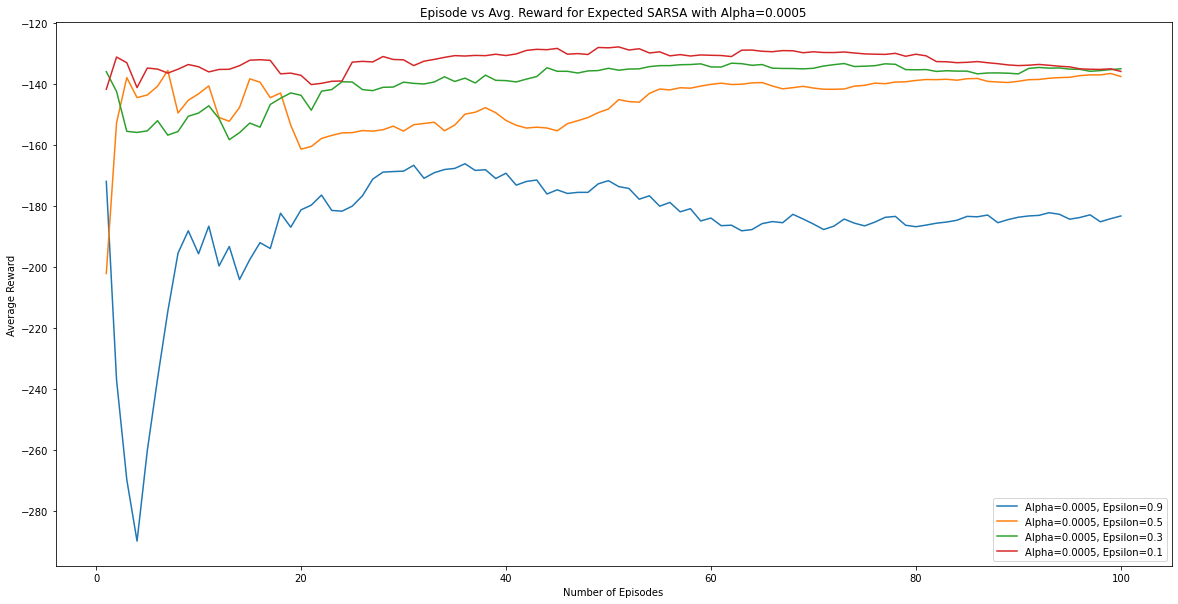

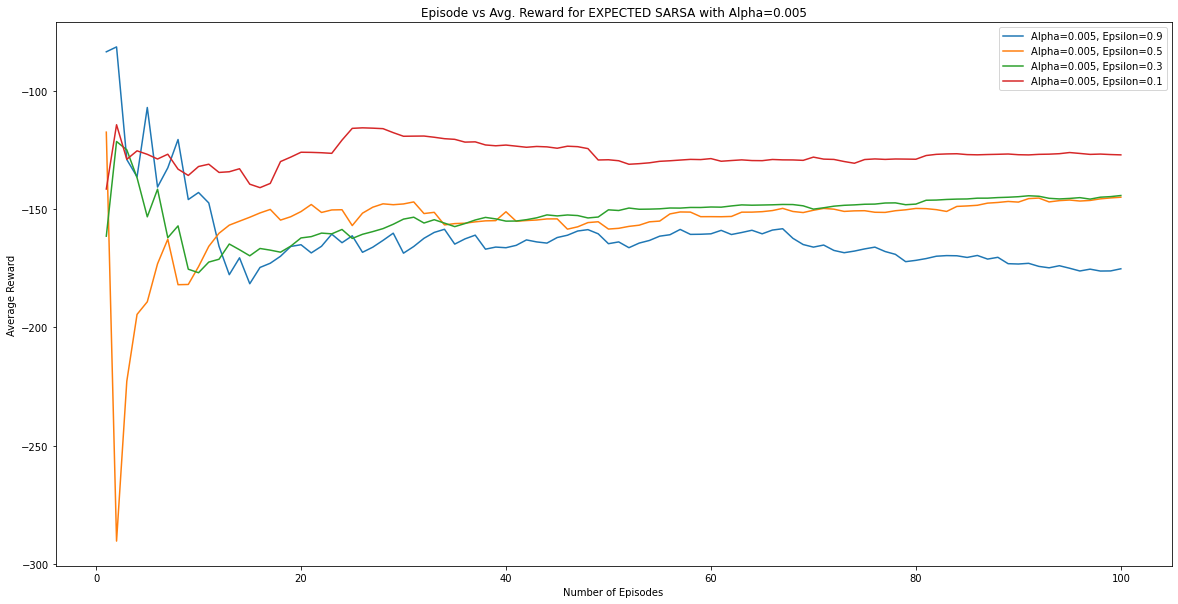

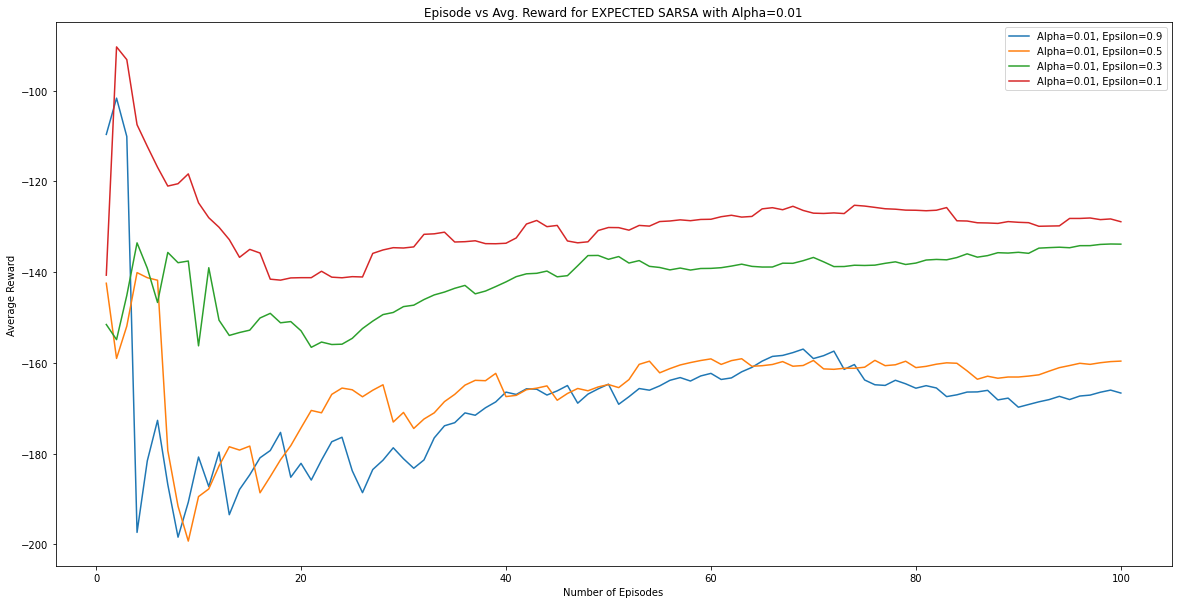

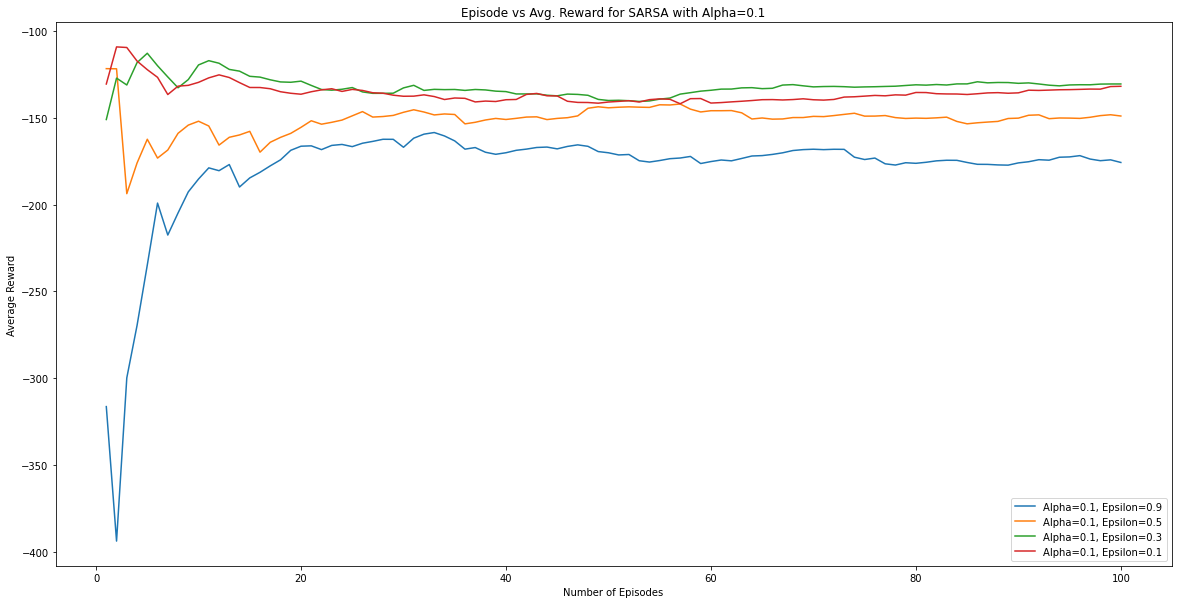

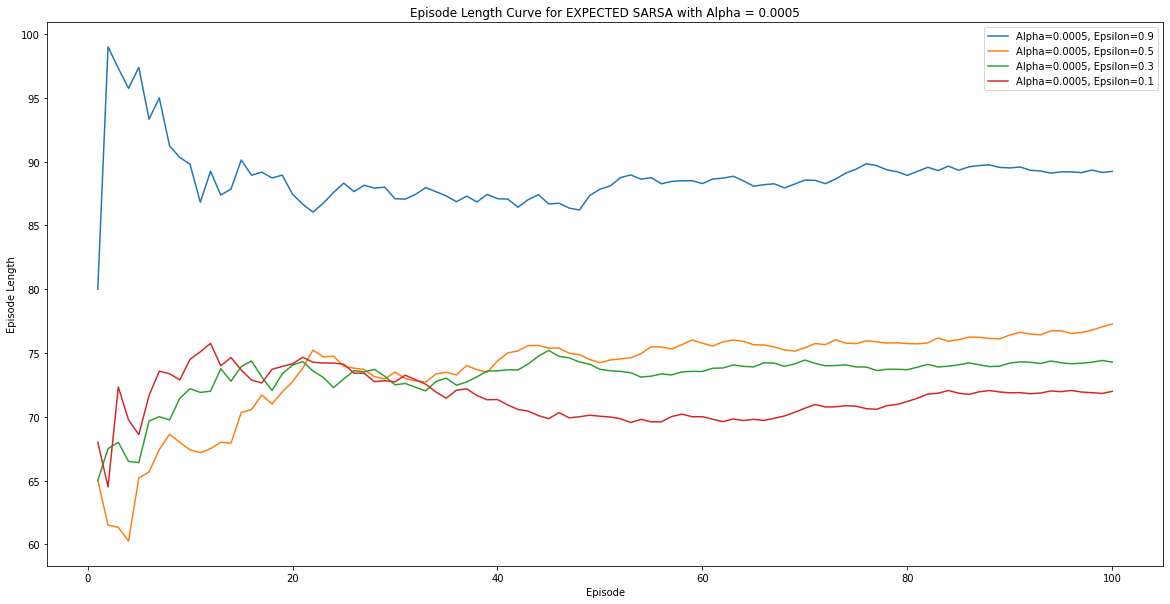

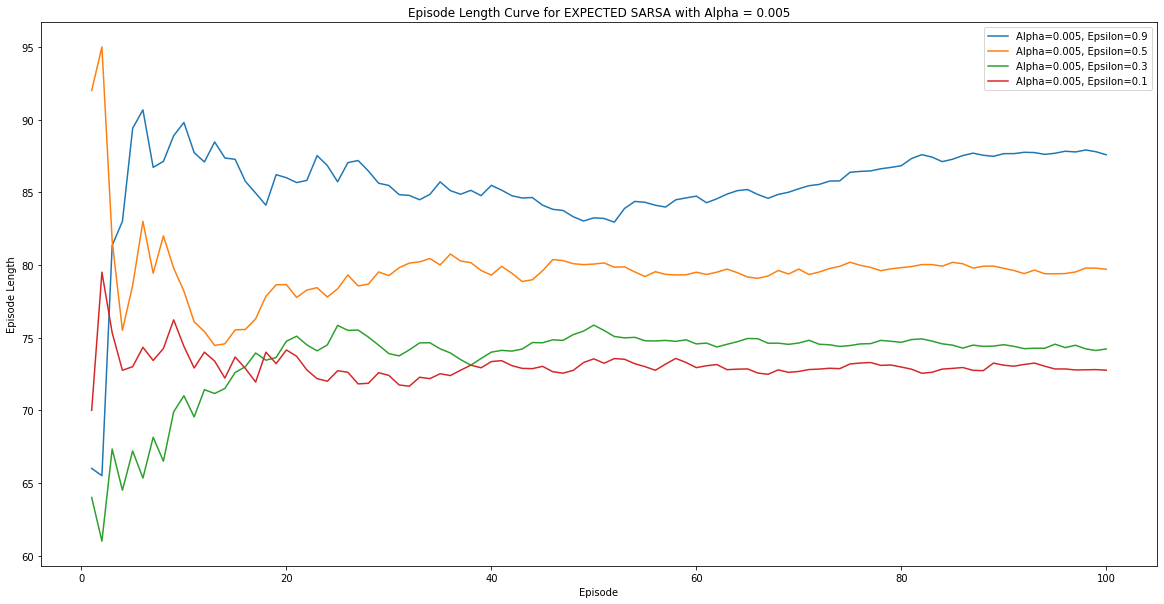

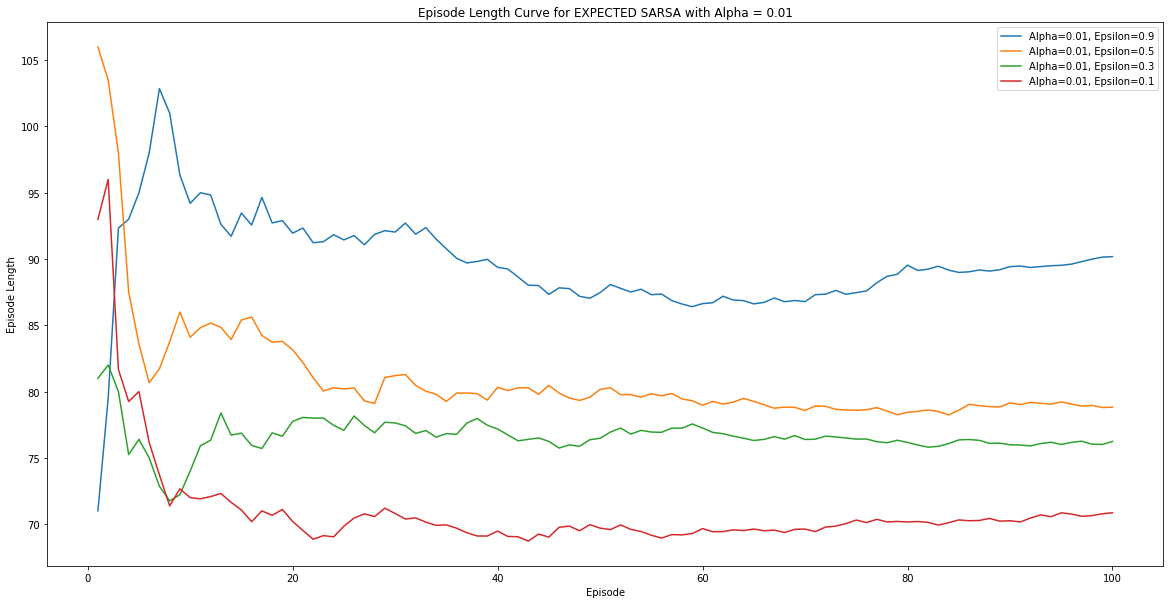

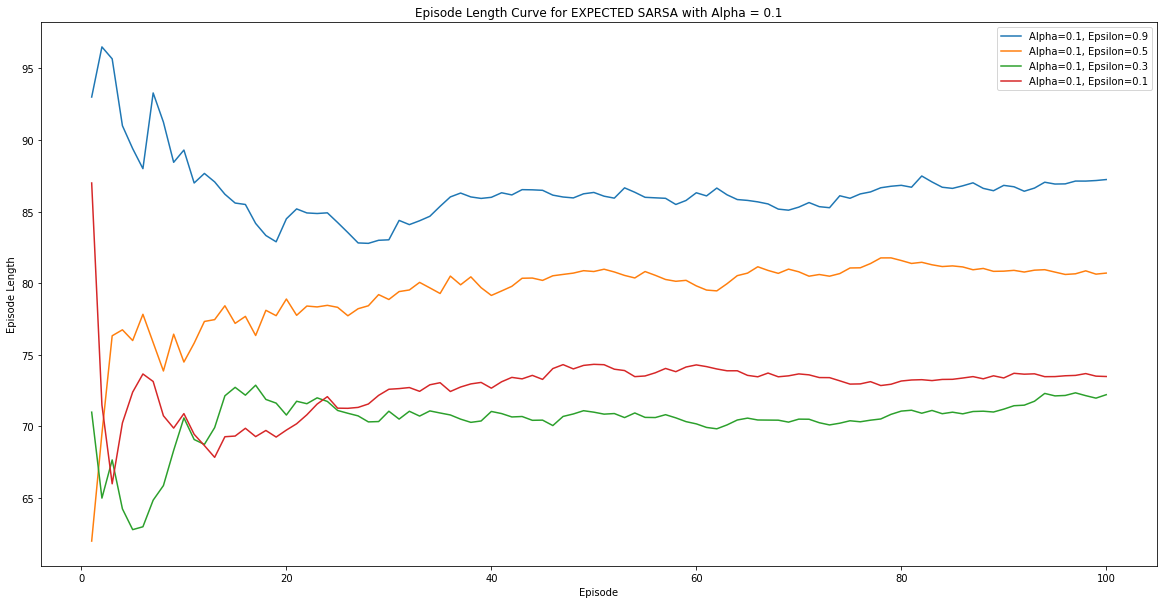

In [ ]:
import matplotlib.pyplot as plt

# GRAPHS FOR EXPECTED SARSA
# Graphs for Episode vs Avg. Reward for EXPECTED SARSA for Alpha=0.0005
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_expSARSA_alpha1[0])
plt.plot(x,y1, label='Alpha=0.0005, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_expSARSA_alpha1[1])
plt.plot(x,y2, label='Alpha=0.0005, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_expSARSA_alpha1[2])
plt.plot(x,y3, label='Alpha=0.0005, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_expSARSA_alpha1[3])
plt.plot(x,y4, label='Alpha=0.0005, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for Expected SARSA with Alpha=0.0005')
plt.legend()
plt.show

# Graphs for Episode vs Avg. Reward for EXPECTED SARSA for Alpha=0.005
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_expSARSA_alpha2[0])
plt.plot(x,y1, label='Alpha=0.005, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_expSARSA_alpha2[1])
plt.plot(x,y2, label='Alpha=0.005, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_expSARSA_alpha2[2])
plt.plot(x,y3, label='Alpha=0.005, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_expSARSA_alpha2[3])
plt.plot(x,y4, label='Alpha=0.005, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for EXPECTED SARSA with Alpha=0.005')
plt.legend()
plt.show

# Graphs for Episode vs Avg. Reward for EXPECTED SARSA for Alpha=0.01
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_expSARSA_alpha3[0])
plt.plot(x,y1, label='Alpha=0.01, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_expSARSA_alpha3[1])
plt.plot(x,y2, label='Alpha=0.01, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_expSARSA_alpha3[2])
plt.plot(x,y3, label='Alpha=0.01, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_expSARSA_alpha3[3])
plt.plot(x,y4, label='Alpha=0.01, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for EXPECTED SARSA with Alpha=0.01')
plt.legend()
plt.show

# Graphs for Episode vs Avg. Reward for EXPECTED SARSA for Alpha=0.1
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
y1 = avg_running_reward_calculator(rew_expSARSA_alpha4[0])
plt.plot(x,y1, label='Alpha=0.1, Epsilon=0.9')
y2 = avg_running_reward_calculator(rew_expSARSA_alpha4[1])
plt.plot(x,y2, label='Alpha=0.1, Epsilon=0.5')
y3 = avg_running_reward_calculator(rew_expSARSA_alpha4[2])
plt.plot(x,y3, label='Alpha=0.1, Epsilon=0.3')
y4 = avg_running_reward_calculator(rew_expSARSA_alpha4[3])
plt.plot(x,y4, label='Alpha=0.1, Epsilon=0.1')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward for SARSA with Alpha=0.1')
plt.legend()
plt.show

#---------------------
# Graphs for analysing amount time it takes to learn for EXPECTED SARSA i.e.
# plot the LEARNING CURVE

# Episode Length Curve for EXPECTED SARSA with Alpha = 0.0005
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_expSARSA_alpha1[0])
plt.plot(x, y1, label='Alpha=0.0005, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_expSARSA_alpha1[1])
plt.plot(x, y2, label='Alpha=0.0005, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_expSARSA_alpha1[2])
plt.plot(x, y3, label='Alpha=0.0005, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_expSARSA_alpha1[3])
plt.plot(x, y4, label='Alpha=0.0005, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for EXPECTED SARSA with Alpha = 0.0005')
plt.legend()
plt.show()

# Episode Length Curve for EXPECTED SARSA with Alpha = 0.005
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_expSARSA_alpha2[0])
plt.plot(x, y1, label='Alpha=0.005, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_expSARSA_alpha2[1])
plt.plot(x, y2, label='Alpha=0.005, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_expSARSA_alpha2[2])
plt.plot(x, y3, label='Alpha=0.005, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_expSARSA_alpha2[3])
plt.plot(x, y4, label='Alpha=0.005, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for EXPECTED SARSA with Alpha = 0.005')
plt.legend()
plt.show()

# Episode Length Curve for EXPECTED SARSA with Alpha = 0.01
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_expSARSA_alpha3[0])
plt.plot(x, y1, label='Alpha=0.01, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_expSARSA_alpha3[1])
plt.plot(x, y2, label='Alpha=0.01, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_expSARSA_alpha3[2])
plt.plot(x, y3, label='Alpha=0.01, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_expSARSA_alpha3[3])
plt.plot(x, y4, label='Alpha=0.01, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for EXPECTED SARSA with Alpha = 0.01')
plt.legend()
plt.show()

# Episode Length Curve for EXPECTED SARSA with Alpha = 0.1
plt.figure(figsize=(20,10))
x = range(1, num_episodes+1)
y1 = running_avg_eplen_calculator(eplen_expSARSA_alpha4[0])
plt.plot(x, y1, label='Alpha=0.1, Epsilon=0.9')
y2 = running_avg_eplen_calculator(eplen_expSARSA_alpha4[1])
plt.plot(x, y2, label='Alpha=0.1, Epsilon=0.5')
y3 = running_avg_eplen_calculator(eplen_expSARSA_alpha4[2])
plt.plot(x, y3, label='Alpha=0.1, Epsilon=0.3')
y4 = running_avg_eplen_calculator(eplen_expSARSA_alpha4[3])
plt.plot(x, y4, label='Alpha=0.1, Epsilon=0.1')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve for EXPECTED SARSA with Alpha = 0.1')
plt.legend()
plt.show()

**OBSERVATIONS:**


*   Changing epsilon & keeping alpha constant:
> As epsilon increases, reward decreases and length per episode increases.

*   Changing alpha & keeping epsilon constant:
> As alpha is increased, there isn't any substantial change in reward length per episode.


INFERENCE:The best combination of epsilon and alpha found is alpha = 0.1 & epsilon = 0.3 for expected SARSA

***Running best combination of alpha & epsilon for SARSA***

alpha = 0.1
epsilon = 0.1

In [ ]:
env = gym.make("LunarLander-v2", render_mode='human')

bins_size = [10,10,10,10,10,10,2,2]
obs_bins = [np.linspace(env.observation_space.low[0], env.observation_space.high[0], bins_size[0]),
            np.linspace(env.observation_space.low[1], env.observation_space.high[1], bins_size[1]),
            np.linspace(env.observation_space.low[2], env.observation_space.high[2], bins_size[2]),
            np.linspace(env.observation_space.low[3], env.observation_space.high[3], bins_size[3]),
            np.linspace(env.observation_space.low[4], env.observation_space.high[4], bins_size[4]),
            np.linspace(env.observation_space.low[5], env.observation_space.high[5], bins_size[5]),
            np.linspace(env.observation_space.low[6], env.observation_space.high[6], bins_size[6]),
            np.linspace(env.observation_space.low[7], env.observation_space.high[7], bins_size[7])]

gamma = 0.9
epsilon = 0.1
alpha = 0.1
num_episodes = 100
no_Actions = env.action_space.n

# Initializing Q-table
Q = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
# Training the agent
Q, episode_length, reward_in_episode = SARSA(env,Q,gamma,bins_size, alpha,epsilon, num_episodes)

***Running best combination of alpha & epsilon for EXPECTED SARSA***

**alpha = 0.1**

**epsilon = 0.3**

In [ ]:
env = gym.make("LunarLander-v2", render_mode='human')
gamma = 0.9
epsilon = 0.3
alpha = 0.1
num_episodes = 100
no_Actions = env.action_space.n

# Initializing Q-table
Q_expectedSARSA = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
# Training the agent
Q_expectedSARSA, episode_length_expectedSARSA, reward_in_episode_expectedSARSA = Expected_SARSA(env,Q_expectedSARSA,gamma,bins_size, alpha,epsilon, num_episodes)

## 3. SARSA($\lambda$)
Implementing SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous exercise(execise 2). Comparing the performance of SARSA($\lambda$) with that of plain SARSA algorithm.

In [ ]:
# IMPLEMENTING SARSA(LAMBDA)

# function to discretize observations into bins
def discretize(bins_size, observation):
  obs = []
  for i in range(len(observation)):
    obs.append(np.digitize(observation[i], obs_bins[i]) - 1)
  return tuple(obs)


# Defining the beahaviour policy
# beahavious policy = epsilon greedy
def behaviour_policy(Q,state,epsilon):
  prob_dist = np.random.uniform(0,1)
  if prob_dist < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q[state])
  return action

# Implementing SARSA (on-policy TD Control) for estimating Q = q*
def SARSA_Lambda(env,Q,gamma,bins_size, alpha,epsilon, num_episodes,eligibility_trace, lambda_val):
  episode_length = []
  reward_in_episode = []
  # looping for each episode
  for i in range(num_episodes):
    reward_of_ep = 0
    ep_len = 0
    obs = env.reset()
    state = discretize(bins_size, obs[0])
    action = behaviour_policy(Q,state,epsilon)
    done = False

    while (not done):
      next_state, reward, done,truncated, _ = env.step(action)
      next_state_disc = discretize(bins_size, next_state)
      next_state_action = behaviour_policy(Q,next_state_disc,epsilon)

      # calculate TD eroor & eligibility trace update
      td_error = reward + gamma*(Q[next_state_disc][next_state_action]) - Q[state][action]
      # print((td_error))
      eligibility_trace[state,action] += 1

      # update Q table & eligibility trace
      for first_bin in range(bins_size[0]):
        for second_bin in range(bins_size[1]):
          for third_bin in range(bins_size[2]):
            for fourth_bin in range(bins_size[3]):
              for fifth_bin in range(bins_size[4]):
                for sixth_bin in range(bins_size[5]):
                  for seventh_bin in range(bins_size[6]):
                    for eighth_bin in range(bins_size[7]):
                      for a in [0,1,2,3]:
                        if i<=2:
                          Q[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a] += (alpha * td_error * eligibility_trace[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a])
                          eligibility_trace[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a] *= gamma*lambda_val

                        elif Q[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a] != 0 :
                          Q[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a] += (alpha * td_error * eligibility_trace[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a])
                          eligibility_trace[first_bin][second_bin][third_bin][fourth_bin][fifth_bin][sixth_bin][seventh_bin][eighth_bin][a] *= gamma*lambda_val

      state = next_state_disc
      action = next_state_action
      ep_len += 1
      reward_of_ep += reward
      if done:
        episode_length.append(ep_len)
        reward_in_episode.append(reward_of_ep)
        break
  return Q, episode_length, reward_in_episode

In [ ]:
# running SARSA(LAMBDA)
env = gym.make("LunarLander-v2")

# Creating bins
# bins_size = [10,10,50,50,30,50,2,2]
bins_size = [8,8,8,8,8,8,2,2]
obs_bins = [np.linspace(env.observation_space.low[0], env.observation_space.high[0], bins_size[0]),
            np.linspace(env.observation_space.low[1], env.observation_space.high[1], bins_size[1]),
            np.linspace(env.observation_space.low[2], env.observation_space.high[2], bins_size[2]),
            np.linspace(env.observation_space.low[3], env.observation_space.high[3], bins_size[3]),
            np.linspace(env.observation_space.low[4], env.observation_space.high[4], bins_size[4]),
            np.linspace(env.observation_space.low[5], env.observation_space.high[5], bins_size[5]),
            np.linspace(env.observation_space.low[6], env.observation_space.high[6], bins_size[6]),
            np.linspace(env.observation_space.low[7], env.observation_space.high[7], bins_size[7])]

gamma = 0.9
alpha = 0.1
epsilon = 0.1
num_episodes = 80
lambda_val = 0.5
no_Actions = env.action_space.n

# Initializing Q-table and eligibility trace
Q = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
eligibility_trace = np.zeros((bins_size[0],bins_size[1],bins_size[2],bins_size[3],bins_size[4],bins_size[5],bins_size[6],bins_size[7], no_Actions))
# Training the agent
Q, episode_length_SARSA_Lambda, reward_in_episode_SARSA_Lambda = SARSA_Lambda(env,Q,gamma,bins_size, alpha,epsilon, num_episodes, eligibility_trace, lambda_val)

In [ ]:
# calculate running average of reward
avg_reward_per_ep_SARSA_Lambda = [] # this is running avegrage
for i in range(len(reward_in_episode_SARSA_Lambda)):
  y = 0
  for j in range(0,i+1):
    y += reward_in_episode_SARSA_Lambda[j]
  y = y/(i+1)
  avg_reward_per_ep_SARSA_Lambda.append(y)

In [ ]:
# Running simple SARSA
Q, episode_length_Sarsa, reward_in_episode_Sarsa = SARSA_non_render(env,Q,gamma,bins_size, alpha,epsilon, num_episodes)
# calculate running average of reward
avg_reward_per_ep_Sarsa = [] # this is running avegrage
for i in range(len(reward_in_episode_Sarsa)):
  y = 0
  for j in range(0,i+1):
    y += reward_in_episode_Sarsa[j]
  y = y/(i+1)
  avg_reward_per_ep_Sarsa.append(y)
# calculate running average of episode lengths
running_avg_eplen_Sarsa = [sum(episode_length_Sarsa[:i])/i for i in range(1, len(episode_length_Sarsa)+1)]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
x = np.arange(1,num_episodes+1,1)
plt.plot(x,avg_reward_per_ep_Sarsa, label='SARSA(Lambda)')
plt.plot(x,avg_reward_per_ep_Sarsa, label='SARSA')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')
plt.title('Episode vs Avg. Reward')
plt.legend()
plt.show

# calculate running average of episode lengths
running_avg_eplen_SARSA_Lambda = [sum(episode_length_SARSA_Lambda[:i])/i for i in range(1, len(episode_length_SARSA_Lambda)+1)]

# plot the learning curve
plt.figure(figsize=(20,10))
plt.plot(range(1, num_episodes+1), running_avg_eplen_SARSA_Lambda, label='SARSA(Lambda)')
plt.plot(range(1, num_episodes+1), running_avg_eplen_Sarsa, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Episode Length')
plt.title('Episode Length Curve')
plt.legend()
plt.show()

**OBSERVATIONS:**
> 1. SARASA(Lambda) is better as compared to simple SARSA. This can be attributed to the fact that SARSA(lambda) can more efficiently explore the state-action space because it updates its Q-values less frequently as compared to SARSA.
>2. Convergence: SARSA(lambda) can converge faster than SARSA because it uses eligibility traces to assign credit to state-action pairs that lead to reward, even if they are several steps away from the final reward.
> 3. SARSA(λ) is more computationally expensive than SARSA because it requires more memory and a larger number of computations. Due to this, I have run SARSA(lambda) for a small number of episodes so the graphs might not show clearly that it is better than simple SARSA.
>>NOTE: As stated in point 3, the above algorithm has been run for a very less number of episodes since it rakes a lot of time to finish, so the clear convergences may not be that clear. For clearer results, please run SARSA(LAMBDA) for a hugher number of episodes.